
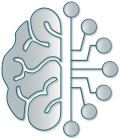

In [ ]:
# This now triggers vID.init() automatically via __init__.py
import pyphyschemtools as t4pPC
from pyphyschemtools import fg, hl, bg, color
t4pPC.init()
%matplotlib inline

#cancel the "last show-up" behaviour of Jupyter notebooks
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


__author__ = "Stella Christodoulou & Romuald Poteau, LPCNO (INSA-CNRS-UT lab, Toulouse, France)"

# Top 10 Machine Learning Algorithms For Beginners, Applied to Physics and Chemistry Problems: Supervised, and More

## Introduction

<div class="intro">

There are several machine learning algorithms that do not rely on neural networks, they are often easier to interpret and faster to train, especially for tabular or structured data. Here are the main categories:

🌳 **Tree-based methods**

- **Decision Trees** – simple, rule-based partitions of the data.  
- **Random Forests** – ensembles of decision trees with bagging.  
- **Gradient Boosting Machines (GBM, XGBoost, LightGBM, CatBoost)** – trees trained sequentially to correct errors, very powerful for structured/tabular data.  

---

📈 **Linear and generalized linear models**

- **Linear Regression / Logistic Regression** – interpretable, work well when the relationship is approximately linear.  
- **Ridge / Lasso / Elastic Net** – linear models with regularization to avoid overfitting.  

---

📊 **Support Vector Machines (SVM) and Support Vector Regression (SVR)**

- Work with a kernel trick to separate data in higher dimensions.  
- Often good for medium-sized datasets.  

---

🌀 **Probabilistic models**

- **Naïve Bayes** – simple, probabilistic classifier assuming independence.  
- **Gaussian Processes** – powerful, non-parametric Bayesian approach, especially in regression.  

---

🧩 **Instance-based methods**

- **k-Nearest Neighbors (kNN)** – predictions based on similarity with nearby points.  

---

🎲 **Clustering / unsupervised**

- **k-Means, Hierarchical Clustering, DBSCAN** – unsupervised grouping without neurons.  
- **PCA, t-SNE, UMAP** – dimensionality reduction methods.  
</div>

## Why is the random seed initialized to 42 in most datascience and ML applications?

<div class="rqE">

42 is iconic. It comes from Douglas Adams’s popular 1979 science-fiction novel *The Hitchhiker’s Guide to the Galaxy*. Toward the end of the book, the supercomputer Deep Thought reveals that the answer to the “Great Question” of “Life, the Universe and Everything” is “**forty-two**”. It took 7.5 million years to Deep Thought to calculate the answer to the ultimate question...

The author’s choice of the number 42 has become a reference in nerd culture. And it has its own [wikipedia entry](https://en.wikipedia.org/wiki/42_(number))

<figure>
<img width = "500px" src="./MiscImages/ML/42c.png" alt="Forty-two" />
<figcaption><b>Deep Thought</b>, the machine built to answer the ultimate question, stands in the cosmic void. Before it, the long-awaited answer Answer to the Ultimate Question of Life, the Universe, and Everything: <b>42</b></figcaption>
</figure> 
</div>
</div>

## Linear regression. Application to the correlation between diabetes and several criteria

### Introduction

<div class="intro">

Linear Regression predicts a continuous output by establishing a linear relationship between input variables and the output
</div>

### The database

<div class="intro">

Ten baseline variables, age, sex, body mass index (bmi), average blood pressure (bp), and six blood serum measurements (s1 to s6) were obtained for each of n = 442 diabetes patients, as well as the response of interest, hereafter named "the target", a quantitative measure of disease progression one year after baseline, see [https://scikit-learn.org/](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset)

Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of n_samples (i.e. the sum of squares of each column totals 1)
</div>

#### Distribution of the measure of disease progression one year after baseline

<div class="intro">
Let's first load and inspect the distribution of the target variable.
This gives us an idea of whether it's skewed, normally distributed, or contains outliers.
</div>

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


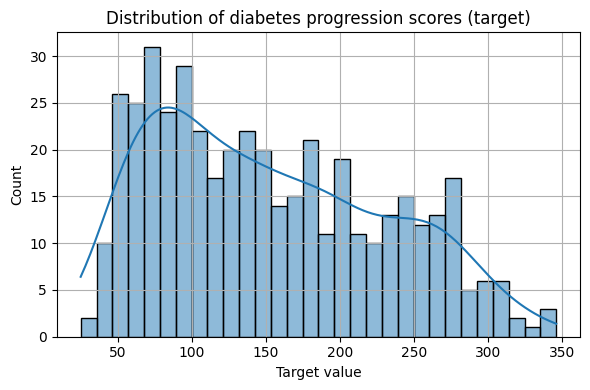

In [4]:
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Diabetes dataset
diabetes = load_diabetes()
# Convert the dataset to a DataFrame
diabetes_df = pd.DataFrame(data=diabetes.data,
                           columns=diabetes.feature_names)

# Add target variable to the DataFrame
diabetes_df['target'] = diabetes.target
display(diabetes_df)

plt.figure(figsize=(6, 4))
sns.histplot(diabetes_df['target'], bins=30, kde=True)
plt.title("Distribution of diabetes progression scores (target)")
plt.xlabel("Target value")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Linear correlation between each feature and the target

<div class="intro">

This helps identify which features are more likely to have predictive power under a linear model.
We will use the `df.corr()` method in pandas, that computes the Pearson correlation coefficient matrix between all numeric columns in a DataFrame.

The Pearson correlation coefficient (denoted *r*) measures the strength and direction of a linear relationship between two continuous variables. It ranges from:
- +1 → perfect positive linear relationship
- 0 → no linear relationship
- -1 → perfect negative linear relationship

For two variables *X* and *Y*, it is calculated as:

$$r = \frac{\mathrm{cov}(X, Y)}{\sigma_X \, \sigma_Y}$$

where:
- $\mathrm{cov}(X, Y)$ is the covariance between *X* and *Y*
- $\sigma_X$ and $\sigma_Y$ are their respective standard deviations
</div>
<br>
<div class="rqE">

Pearson correlation only captures linear relationships. Two variables can be strongly related in a nonlinear way but still have a correlation close to zero. 

It is sensitive to outliers, which can distort the value of *r*
</div>

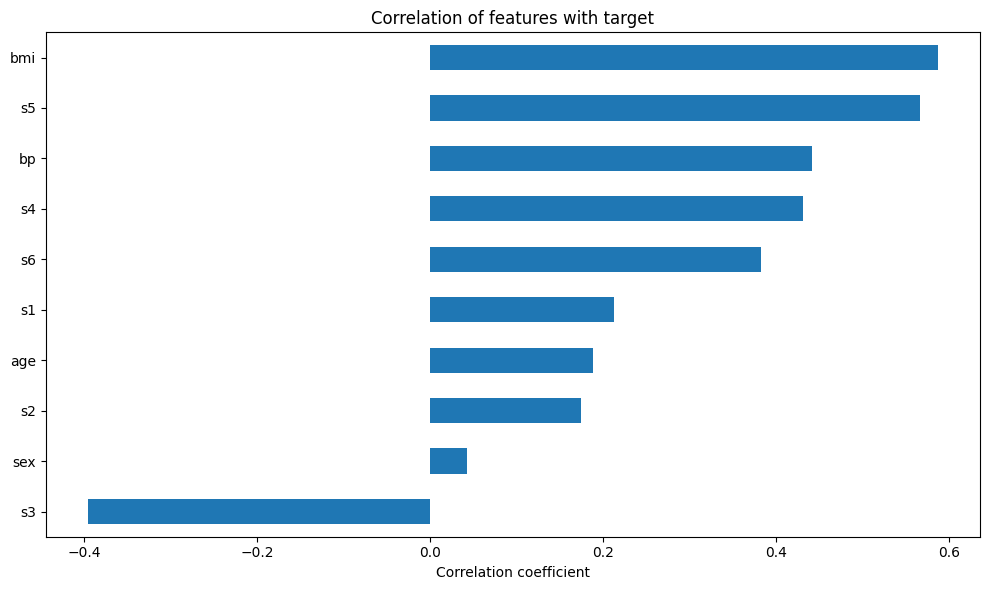

In [7]:
plt.figure(figsize=(10, 6))
correlations = diabetes_df.corr(numeric_only=True)['target'].drop('target').sort_values()
correlations.plot(kind='barh')
plt.title("Correlation of features with target")
plt.xlabel("Correlation coefficient")
plt.tight_layout()
plt.show()

#### Scatter Plots: Target vs Features

<div class="intro">

Now let's visualize how each feature relates to the target variable using scatter plots: this reveals possible non-linear relationships, or outliers.

</div>

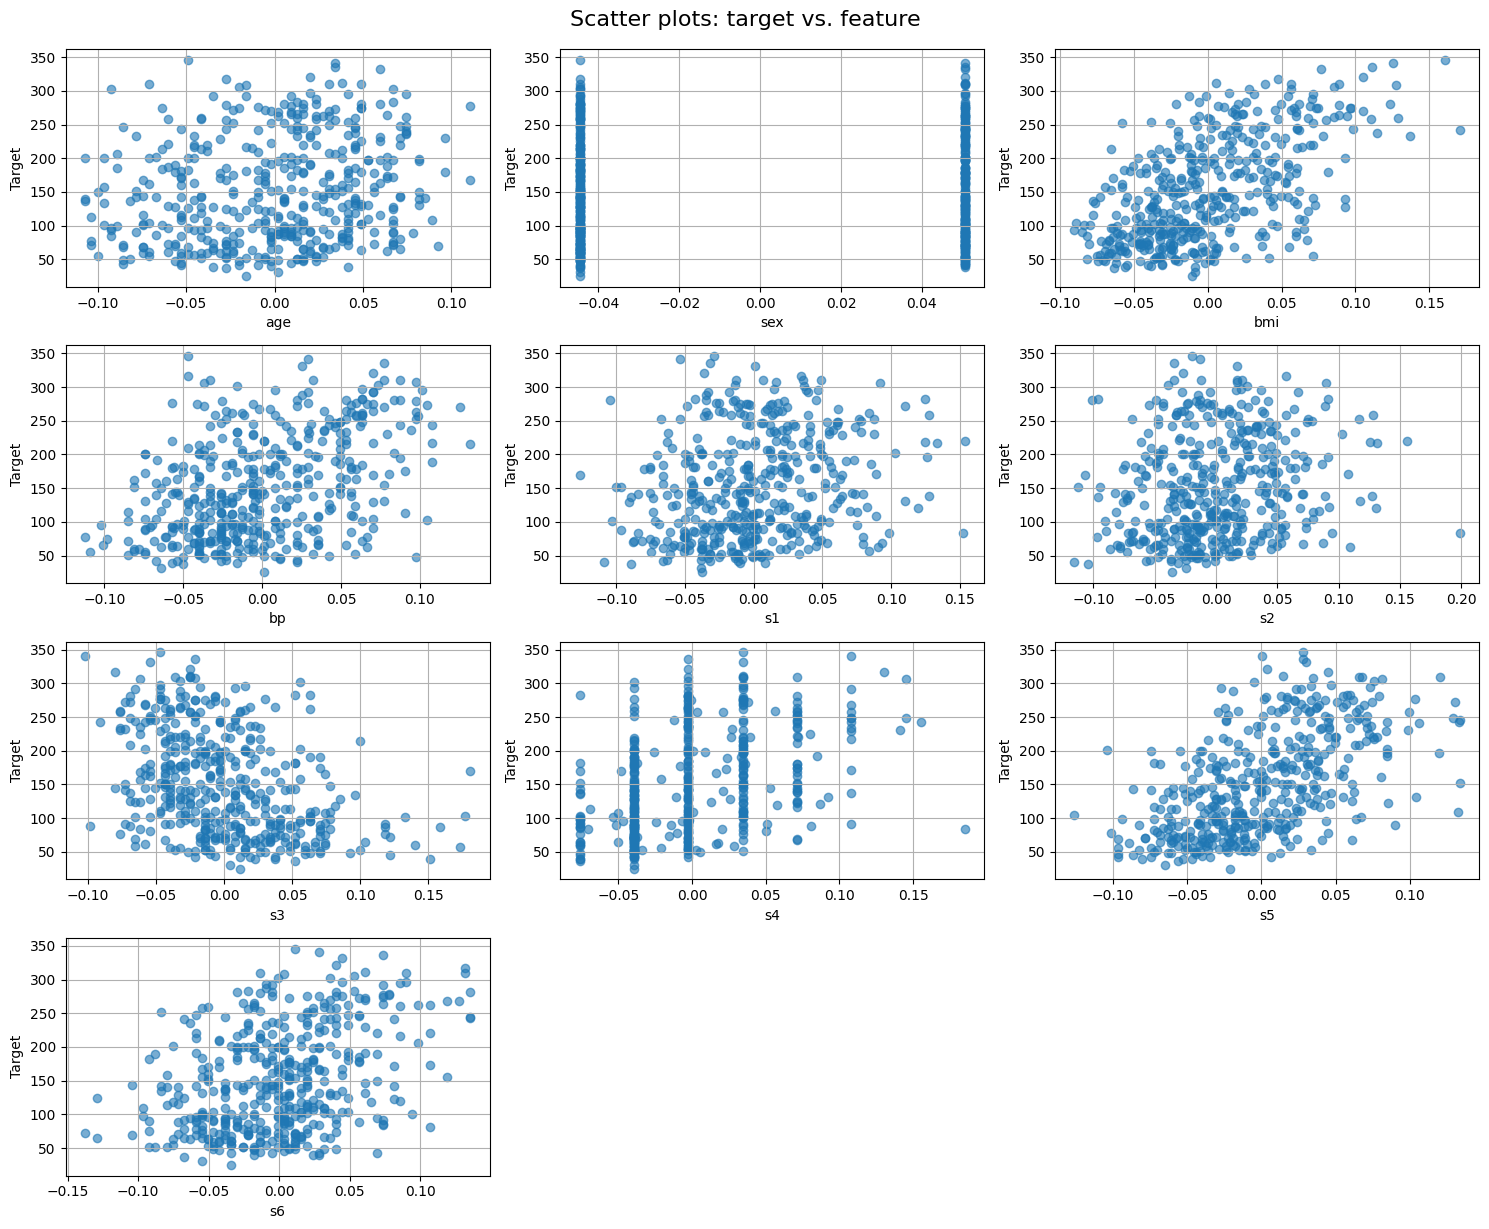

In [8]:
import math

n_cols = 3
n_features = len(diabetes.feature_names)
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, feature in enumerate(diabetes.feature_names):
    axes[i].scatter(diabetes_df[feature], diabetes_df['target'], alpha=0.6)
    axes[i].set_ylabel("Target")
    axes[i].set_xlabel(feature)
    axes[i].grid(True)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Scatter plots: target vs. feature", fontsize=16, y=1.02)
plt.show()


### Training a linear model

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X, y = diabetes.data, diabetes.target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the test set results
y_hat = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_hat)
mae = mean_absolute_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)

print(f"MAE = {mae:.1f}")
print(f"MSE = {mse:.1f}")
print(f"R2 = {r2:.2f}")

MAE = 42.8
MSE = 2900.2
R2 = 0.45


<div class="rqE">

These results indicate that such Linear Regression model explains about 45% of the variance in the diabetes dataset. The MAE tells us that predictions are about 43 units away from the true values... which is obviously bad. **Such linear model is not adapted at all**.
</div>

### Graphical output

#### Performance of the model: Predicted *vs* True values

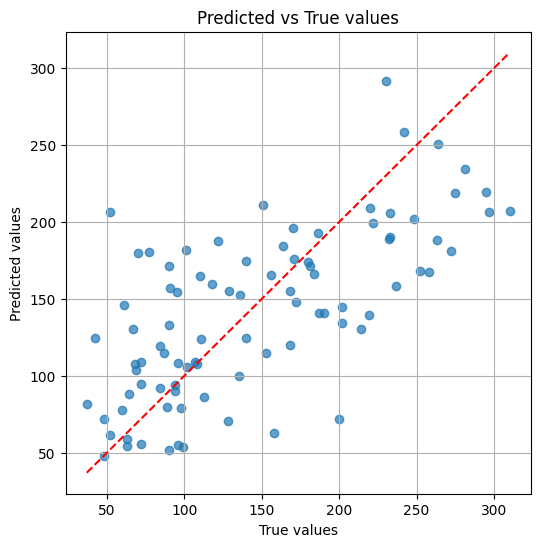

In [10]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_hat, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r',linestyle="--")
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("Predicted vs True values")
plt.grid(True)
plt.show()


#### Coefficients of the linear regression model for each feature

<div class="intro">
    
This code creates a horizontal bar chart showing the learned coefficients of the linear regression model for each feature.
It helps visualize which variables have the strongest positive or negative influence on the predicted target, assuming the linear model is appropriate - which, in this case, is likely not fully valid due to weak or nonlinear relationships.
</div>

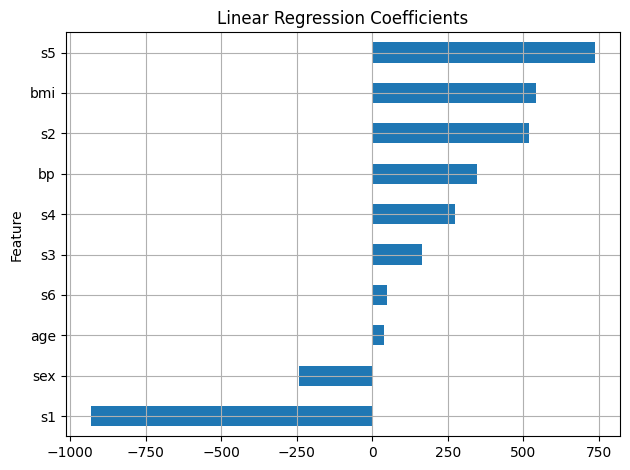

In [11]:
coeff_df = pd.DataFrame({
    'Feature': diabetes.feature_names,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient')

coeff_df.plot(kind='barh', x='Feature', y='Coefficient', legend=False)
plt.title("Linear Regression Coefficients")
plt.grid(True)
plt.tight_layout()
plt.show()


## Logistic regression. Application to the Breast Cancer Dataset

### Introduction
<div class="introT" title="Classification">

Logistic Regression is used for classification problems. It predicts the probability that a given data point belongs to a certain class, like yes/no or 0/1. It uses a logistic function to output a value between 0 and 1. This value is then mapped to a specific class based on a threshold (usually 0.5)

`LogisticRegression` in **scikit-learn** is a **linear classification algorithm** used for **binary or multiclass classification tasks**. Despite its name, it is not used for regression, but rather for **predicting class membership** based on input features.
</div>
<br>
<div class='introT' title="Input features">
    
The model learns a **linear combination of the input features**:

$$z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n$$

It then transforms this linear score $ z $ into a **probability** using the **logistic (sigmoid) function**:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

This output $ \sigma(z) $ is interpreted as the probability that the input belongs to class **1** (versus class **0**).
</div>
<br>
<div class="introT" title="The sigmoid function">
The logistic (or sigmoid) function is the core of logistic regression. It maps any real-valued input to a value between 0 and 1, which can be interpreted as a probability. This S-shaped curve ensures outputs are well-suited for binary classification
</div>

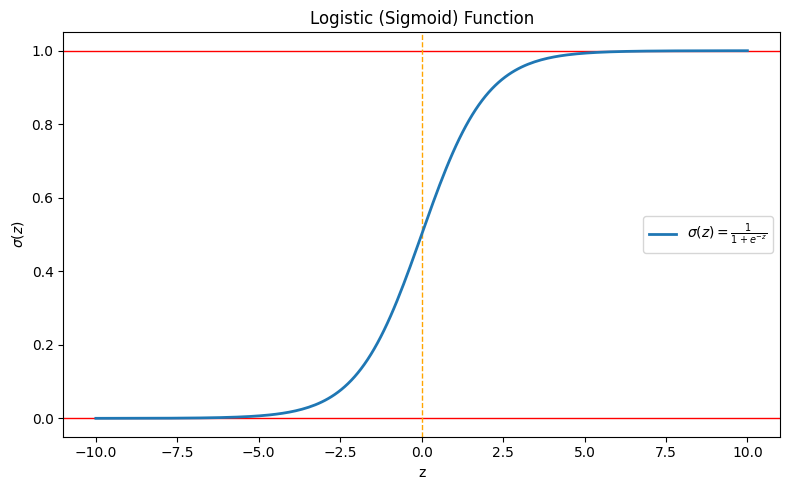

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define the logistic (sigmoid) function
def logistic(z):
    return 1 / (1 + np.exp(-z))

# Generate input values from -10 to 10
z = np.linspace(-10, 10, 200)
sigmoid = logistic(z)

# Plotting the logistic function
plt.figure(figsize=(8, 5))
plt.title("Logistic (Sigmoid) Function")
plt.xlabel("z")
plt.ylabel(r'$\sigma(z)$')
plt.axhline(0, color='red', linewidth=1)
plt.axhline(1, color='red', linewidth=1)
plt.axvline(0, color='orange', linestyle='--', linewidth=1)
plt.plot(z, sigmoid, label=r'$\sigma(z) = \frac{1}{1 + e^{-z}}$', linewidth=2)
plt.legend()
plt.tight_layout()
plt.show()


<div class="introT" title="Prediction">

Given the predicted probability $\mathcal{P} = \sigma(z)$, the model predicts the class as:

$$
\hat{y} =
\begin{cases}
1 & \text{if } \sigma(z) > 0.5 \\
0 & \text{otherwise}
\end{cases}
$$
</div>
<br>
<div class="introT" title="Training">

The model is trained by minimizing the **logistic loss function**, also called **log-loss** or **binary cross-entropy**:

$$
\mathcal{L} = - \sum_{i=1}^{N} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

This encourages the predicted probabilities $\hat{y}_i$ to be close to the true labels $y_i \in \{0, 1\}$.

During training, the logistic regression model learns (or "fits") the parameters $\beta_0, \beta_1, \dots, \beta_n$ by minimizing the cross-entropy function on the training data. These parameters are the weights that determine how each input feature contributes to the predicted probability
</div>

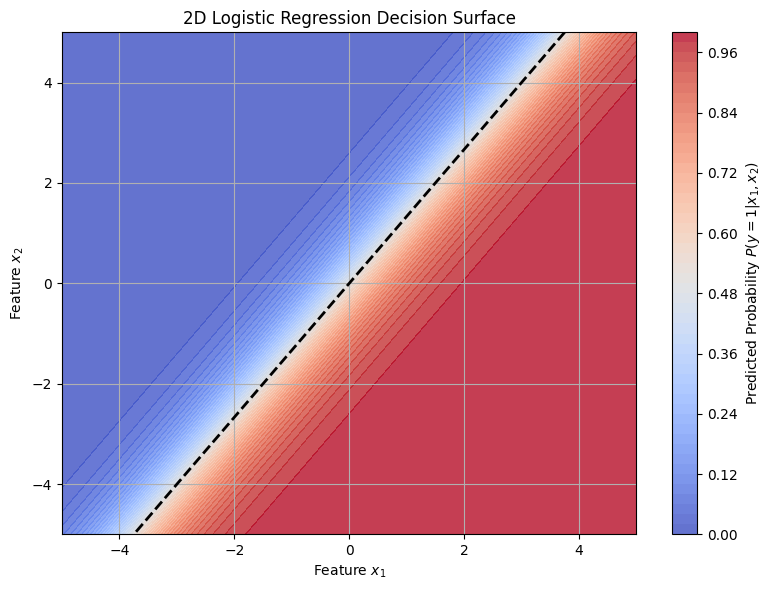

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 2D grid of input features (x1, x2)
x1 = np.linspace(-5, 5, 200)
x2 = np.linspace(-5, 5, 200)
X1, X2 = np.meshgrid(x1, x2)

# Define logistic regression parameters
beta0 = 0.0
beta1 = 2.0  # weight for x1
beta2 = -1.5  # weight for x2

# Compute the linear combination z = beta0 + beta1*x1 + beta2*x2
Z = beta0 + beta1 * X1 + beta2 * X2

# Apply the sigmoid function to get predicted probabilities
P = 1 / (1 + np.exp(-Z))

# Plot the decision surface
plt.figure(figsize=(8, 6))
contour = plt.contourf(X1, X2, P, levels=50, cmap='coolwarm', alpha=0.8)
plt.colorbar(contour, label='Predicted Probability $P(y=1|x_1, x_2)$')

# Overlay the decision boundary where P = 0.5
plt.contour(X1, X2, P, levels=[0.5], colors='black', linestyles='--', linewidths=2)

plt.title("2D Logistic Regression Decision Surface")
plt.xlabel("Feature $x_1$")
plt.ylabel("Feature $x_2$")
plt.grid(True)
plt.tight_layout()
plt.show()


<div class="rqT" title=" The Decision Boundary is Linear">

In logistic regression, we compute a linear combination of input features:

$$
z = \beta_0 + \beta_1 x_1 + \beta_2 x_2
$$

This score is passed through the **sigmoid function** to obtain a probability:

$$
\mathcal{P} = \frac{1}{1 + e^{-z}}
$$

The **decision boundary** is where this probability equals 0.5. That is:

$$
\mathcal{P} = \frac{1}{2} \Rightarrow z = 0
$$

Which leads to:

$$
\beta_0 + \beta_1 x_1 + \beta_2 x_2 = 0
$$

This is the equation of a **line** (or a **hyperplane** in higher dimensions). Therefore, logistic regression produces a **linear decision boundary** in the original feature space.

- Logistic regression can only separate classes that are **linearly separable**, or close to it.
- When the data is **non-linearly separable**, you can:
  - Add **non-linear transformations** (e.g. polynomial features or interactions),
  - Use more powerful models such as **SVMs with kernels**, **decision trees**, or **neural networks**.

</div>

### The dataset

<div class="intro">

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image, see description at [https://scikit-learn.org/](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset) or on [UC Irvine ML repository](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

</div>

In [14]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
# Convert the dataset to a DataFrame
breast_cancer_df = pd.DataFrame(data=breast_cancer.data,
                           columns=breast_cancer.feature_names)

# Add target variable to the DataFrame
breast_cancer_df['target'] = breast_cancer.target
display(breast_cancer_df)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### Training a model

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X, y = breast_cancer.data, breast_cancer.target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predicting the test set results
y_hat = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_hat)
precision = precision_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

Accuracy: 0.96
Precision: 0.95
Recall: 0.99
F1 score: 0.97


<div class="rqE">

About the metrics:
- the recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives
- the F1 score is the harmonic mean of the precision and recall. It thus symmetrically represents both precision and recall in one metric

The high recall indicates that **the model is particularly good at identifying malignant cases**, which is crucial in medical diagnostics.
</div>

### Graphical output

#### Performance of the model: confusion matrix on the test set

<div class="intro">

The confusion matrix displays how many samples were correctly or incorrectly classified. It separates true positives, true negatives, false positives, and false negatives. It complements precision and recall by showing how the model performs in detail.
</div>

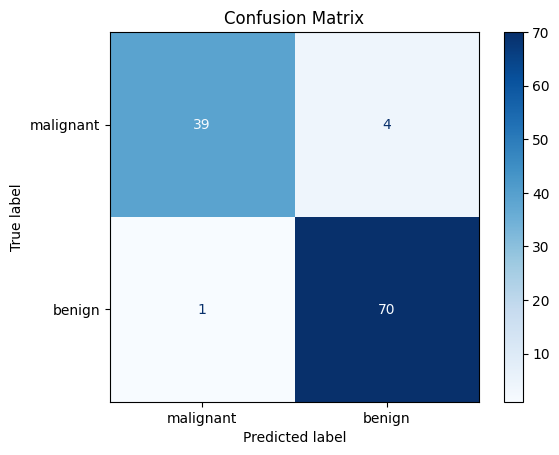

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=breast_cancer.target_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


#### Weights of the descriptors on the breast cancer probability

<div class="intro">

This heatmap shows the weights (coefficients) learned by the logistic regression model. Positive coefficients increase the probability that the tumor is malignant, while negative ones are associated with benign tumors. The intensity reflects the relative importance of each feature in the decision.
</div>

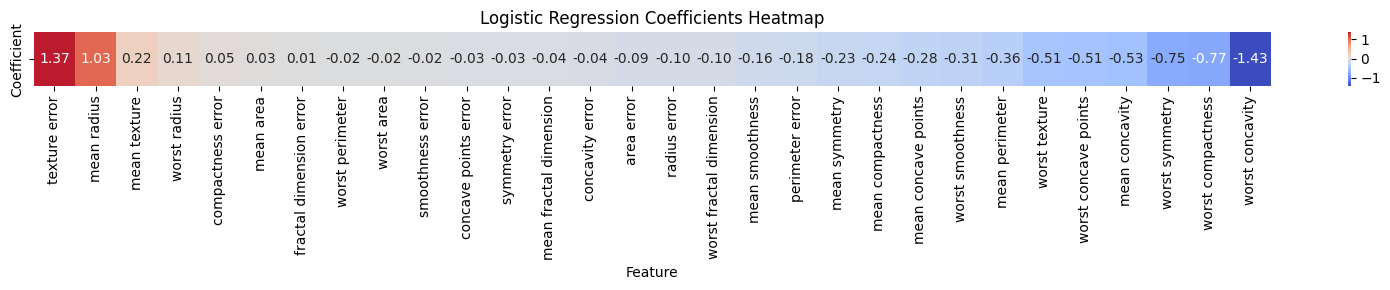

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Récupérer les coefficients et les associer aux noms des features
coef_df = pd.DataFrame({
    'Feature': breast_cancer.feature_names,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

# Heatmap simple
plt.figure(figsize=(16, 3))
sns.heatmap(coef_df.set_index('Feature').T, cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title("Logistic Regression Coefficients Heatmap")
plt.tight_layout()
plt.show()


<div class="rqT" title="Clinical interpretation">

While the logistic regression model highlights which features contribute most to the prediction of malignancy, a meaningful interpretation of these results should be done in collaboration with a medical expert - such as an oncologist or radiologist - to validate whether the model has correctly identified the clinically relevant diagnostic indicators
</div>

#### Receiver Operating Characteristic (ROC) curve

<div class="intro">

The ROC curve illustrates how well the model separates the two classes at various thresholds. A model with an AUC (Area Under the Curve) close to 1.0 performs very well. It helps assess performance beyond a fixed decision threshold. What is calculated and reported for each sample is:

- **X-axis** = False Positive Rate (FPR):  
  The proportion of actual negatives that are incorrectly classified as positive. It is defined as:

  $$
  \text{FPR} = \frac{\text{False Positives}}{\text{False Positives} + \text{True Negatives}} \in [0, 1]
  $$

- **Y-axis** = True Positive Rate (TPR):  
  The proportion of actual positives that are correctly identified. It is defined as:

  $$
  \text{TPR} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} \in [0, 1]
  $$


AUC stands for Area Under the ROC Curve), it quantifies the overall ability of the classifier to rank a random positive example higher than a random negative one.
- AUC = 1.0 → Perfect classifier
- AUC = 0.5 → No better than random guessing
- AUC < 0.5 → Inverted predictions (model is worse than random)
</div>

,Threshold,FPR,TPR
0,inf,0.000000,0.000000
1,9.999992e-01,0.000000,0.014085
2,8.530900e-01,0.000000,0.971831
3,7.280096e-01,0.046512,0.971831
4,7.213938e-01,0.046512,0.985915
5,1.788429e-01,0.116279,0.985915
6,8.481109e-02,0.116279,1.000000
7,6.693443e-25,1.000000,1.000000


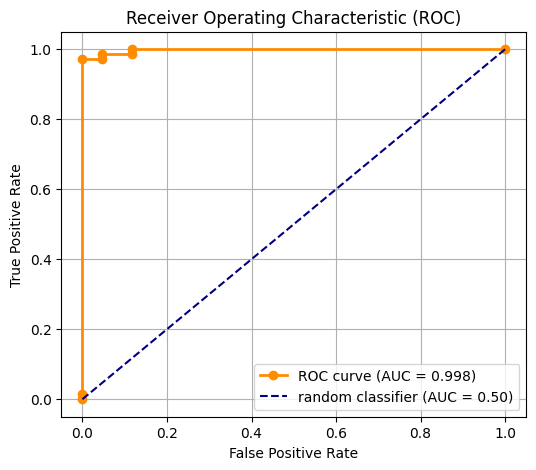

In [18]:
from sklearn.metrics import roc_curve, auc

# Predicted probabilities for the positive class
y_hat = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_hat)
roc_auc = auc(fpr, tpr)

# Show thresholds
import pandas as pd
roc_points = pd.DataFrame({"Threshold": thresholds, "FPR": fpr, "TPR": tpr})
display(roc_points)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', marker="o", lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label="random classifier (AUC = 0.50)")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


#### Thresholds of a ROC curve: calculation step by step

Suppose we have 7 examples, with 1 = Positive Class and 0 = Negative Class

| True label | Predicted score |
| ---------- | --------------- |
| 1          | 0.9             |
| 1          | 0.7             |
| 1          | 0.4             |
| 0          | 0.3             |
| 1          | 0.2             |
| 0          | 0.2             |
| 0          | 0.15             |
| 0          | 0.1             |

By default, `sklearn.metrics.roc_curve` uses `drop_intermediate=True`, which removes intermediate thresholds that don’t add a new corner to the ROC polyline

##### Automatic calculation

Thresholds: [inf 0.9 0.8 0.4 0.3 0.2 0.1]
FPR: [0.         0.         0.16666667 0.33333333 0.5        0.66666667
 1.        ]
TPR: [0.         0.33333333 0.33333333 0.66666667 0.66666667 1.
 1.        ]


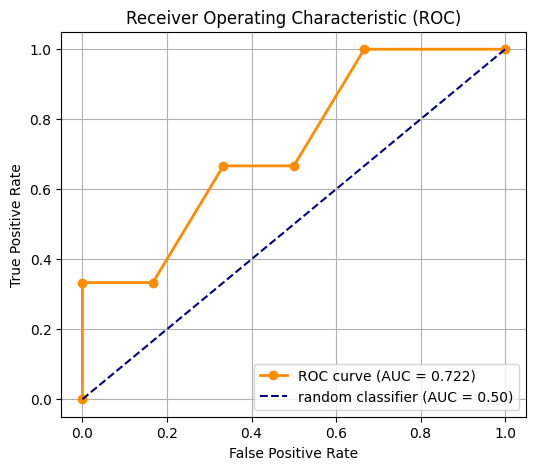

In [19]:
import numpy as np
from sklearn.metrics import roc_curve, auc

y_true= np.array([1,0,1,0,0,1,0,0,0])
y_hat = np.array([0.9,0.8,0.4,0.4,0.3,0.2,0.2,0.15,0.1])

fpr, tpr, thresholds = roc_curve(y_true, y_hat)
roc_auc = auc(fpr, tpr)

print("Thresholds:", thresholds)
print("FPR:", fpr)
print("TPR:", tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', marker="o", lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label="random classifier (AUC = 0.50)")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


##### Step by step calculation

In [20]:
def ROC_at_t(y_hat,y_true,t):
    y_pred = (y_hat >= t).astype(int)
    TP = ((y_pred==1)&(y_true==1)).sum()
    FP = ((y_pred==1)&(y_true==0)).sum()
    TN = ((y_pred==0)&(y_true==0)).sum()
    FN = ((y_pred==0)&(y_true==1)).sum()
    P = (y_true==1).sum()
    N = (y_true==0).sum()
    TPR = TP/P if P else 0.0
    FPR = FP/N if N else 0.0
    return TP,FP,TN,FN,TPR,FPR

rows = []
for t in y_hat:
    TP,FP,TN,FN,TPR,FPR = ROC_at_t(y_hat,y_true,t)
    rows.append([t, TP, FP, TN, FN, FPR, TPR])

df = pd.DataFrame(rows, columns=["threshold","TP","FP","TN","FN","FPR","TPR"])
display(df)

,threshold,TP,FP,TN,FN,FPR,TPR
0,0.90,1,0,6,2,0.000000,0.333333
1,0.80,1,1,5,2,0.166667,0.333333
2,0.40,2,2,4,1,0.333333,0.666667
3,0.40,2,2,4,1,0.333333,0.666667
4,0.30,2,3,3,1,0.500000,0.666667
5,0.20,3,4,2,0,0.666667,1.000000
6,0.20,3,4,2,0,0.666667,1.000000
7,0.15,3,5,1,0,0.833333,1.000000
8,0.10,3,6,0,0,1.000000,1.000000


## Decision trees

<div class="introT" title="The model">

This is a supervised learning algorithm that is used for **classifying problems**. It works well in classifying both categorical and continuous dependent variables. This algorithm divides the population into two or more homogeneous sets based on the most significant attributes/ independent variables.

Decision Trees are like flowcharts, splitting the data based on certain conditions or features. They are applied to regression as well as classification.

The way it operates is by using feature values to split the dataset into more manageable subgroups. Every internal node symbolizes an attribute test, every branch denotes the test’s result, and every leaf node represents a class label, *i.e.* the decision

</div>
<br>
<div class="introT" title="The database">

The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine, each type being related to a specific grape variety; see description at [https://scikit-learn.org/](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset) or on [UC Irvine ML repository](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

</div>

In [21]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd

# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Convert the dataset to a DataFrame
wine_df = pd.DataFrame(data=wine.data,
                           columns=wine.feature_names)

# Add target variable to the DataFrame
wine_df['target'] = wine.target
display(wine_df)



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


### Training the model

In [22]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicting the test set results
y_hat = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_hat)
precision = precision_score(y_test, y_hat, average='macro')
recall = recall_score(y_test, y_hat, average='macro')
f1 = f1_score(y_test, y_hat, average='macro')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

Accuracy: 0.94
Precision: 0.95
Recall: 0.93
F1 score: 0.94


<div class="rqE">

These results indicate that **the Decision Tree model performs very well on this dataset**, given its ability to accurately predict a particular class of wine.
</div>

### Graphical output

#### Performance of the model: confusion matrix on the test set

<div class="intro">

The confusion matrix displays how many samples were correctly or incorrectly classified. It complements precision and recall by showing how the model performs in detail.
</div>

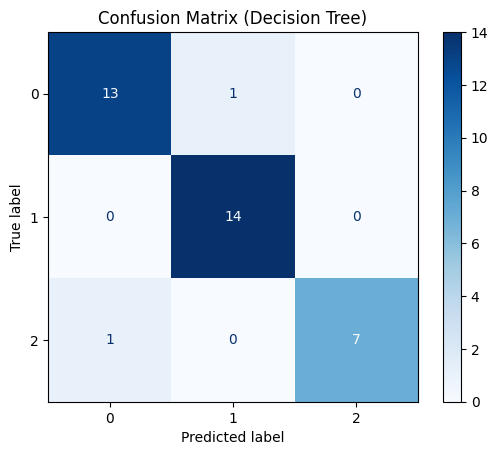

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix 
cm = confusion_matrix(y_test, y_hat, labels=model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix (Decision Tree)")
plt.show()

#### Visualize the tree

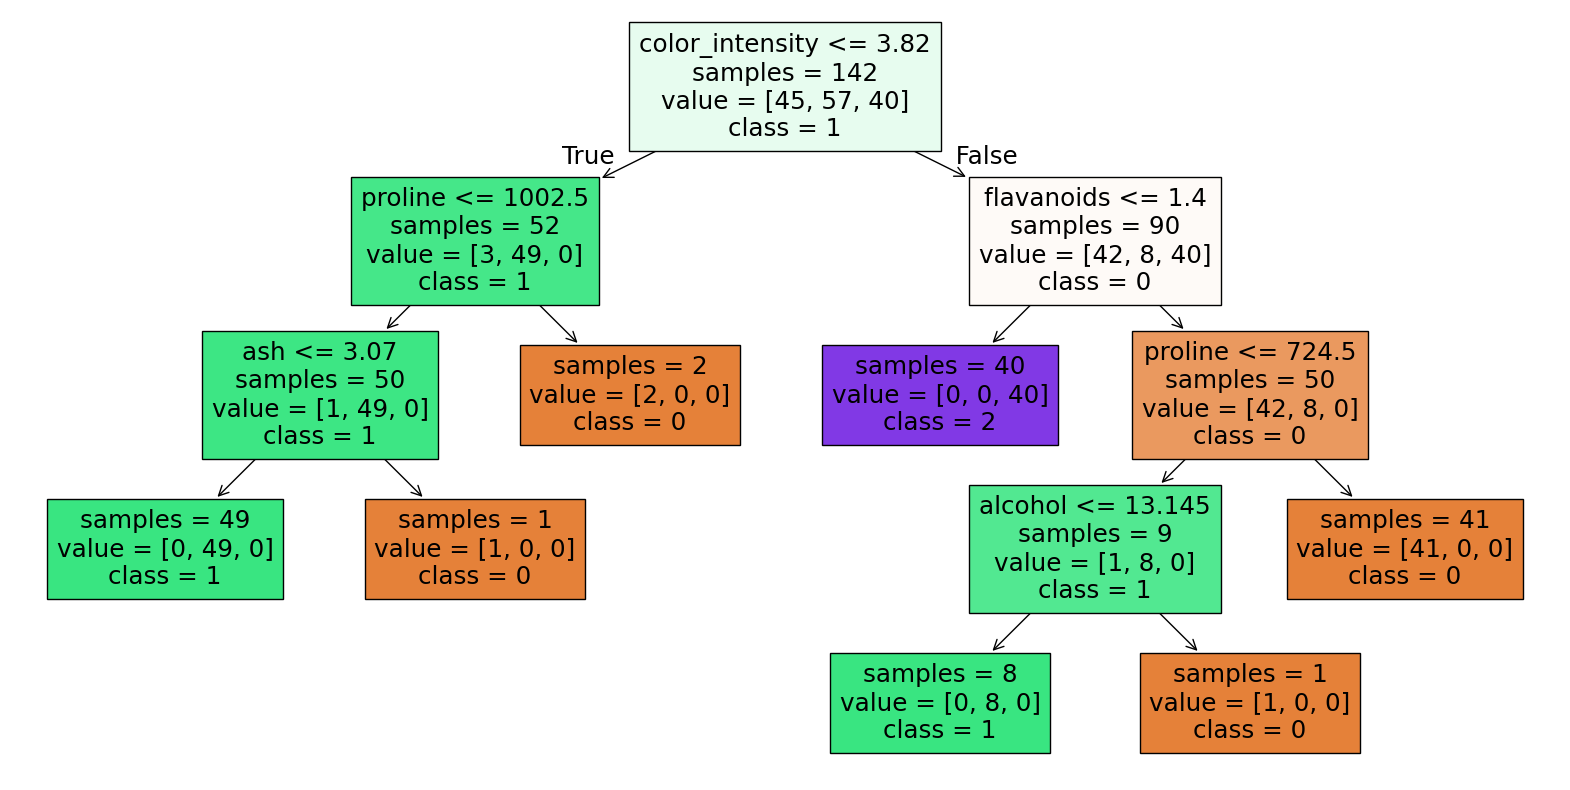

In [24]:
plt.figure(figsize=(20,10))
plot_tree(model, 
          filled=True, 
          feature_names=pd.DataFrame(wine_df.iloc[:,:-1]).columns, 
          class_names=[str(c) for c in model.classes_],
         impurity=False)
plt.show()

#### Feature importance


Important Features:
flavanoids                      0.411053
color_intensity                 0.384934
proline                         0.164075
ash                             0.020942
alcohol                         0.018995
magnesium                       0.000000
alcalinity_of_ash               0.000000
malic_acid                      0.000000
total_phenols                   0.000000
proanthocyanins                 0.000000
nonflavanoid_phenols            0.000000
hue                             0.000000
od280/od315_of_diluted_wines    0.000000
dtype: float64


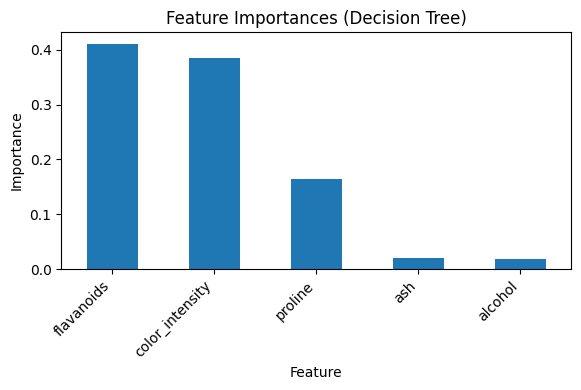

In [25]:
importances = pd.Series(model.feature_importances_, index=wine_df.iloc[:,:-1].columns).sort_values(ascending=False)

print("\nImportant Features:")
print(importances)

# Barplot of feature importance
plt.figure(figsize=(6, 4))
importances[:5].plot(kind='bar')
plt.title("Feature Importances (Decision Tree)")
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Random forest

<div class="introT" title="The model">

This is a supervised ensemble learning algorithm that is used for **both classification and regression** problems. It improves over individual decision trees by combining the results of many trees into a single prediction.

Random Forest works by building multiple decision trees on different random samples of the data. At each split, only a random subset of features is considered. This randomness makes the trees diverse, and when their results are aggregated (majority vote for classification, average for regression), the model is usually more accurate and less likely to overfit.

Random Forests keep the interpretability of decision trees, but gain stability and robustness by averaging across many of them. They also provide a useful measure of feature importance, showing which variables contribute most to the prediction.
<p style="text-align:center;">
    <img src="./ML-Figures/10algos/RF_Fig.jpg" alt="Alt text" width="800"/>
</p>

</div>
<br>
<div class="introT" title="The database">

The data comes from recorded information about earthquake events and their measured impact. Each entry includes several physical and perceptual indicators of the earthquake, such as: 

- **Magnitude** — size of the earthquake measured on the Richter scale.  
- **Depth** — how deep the earthquake occurred below the surface.  
- **CDI** — maximum reported intensity for the event range, based on community reports.  
- **MMI** — maximum estimated instrumental intensity for the event.  
- **SIG** — a comprehensive significance measure determined by multiple factors, including magnitude, maximum MMI, felt reports, and estimated impact. Higher values indicate more significant seismic events.  

The target variable is the alert level, which categorizes earthquakes into four classes: green, yellow, orange, and red. These classes represent increasing severity of the event, from low-impact to high-impact situations.

More details about the dataset can be found on [Kaggle: Earthquake Alert Prediction Dataset](https://www.kaggle.com/datasets/ahmeduzaki/earthquake-alert-prediction-dataset)

</div>

   magnitude  depth  cdi  mmi  sig  alert
0        7.0     14    8    7    0  green
1        6.9     25    4    4  -33  green
2        7.0    579    3    3  -13  green
3        7.3     37    5    5   65  green
4        6.6    624    0    2  -98  green
Columns: ['magnitude', 'depth', 'cdi', 'mmi', 'sig', 'alert']


,magnitude,depth,cdi,mmi,sig,target
0,7.00,14,8,7,0,green
1,6.90,25,4,4,-33,green
2,7.00,579,3,3,-13,green
3,7.30,37,5,5,65,green
4,6.60,624,0,2,-98,green
...,...,...,...,...,...,...
1295,6.87,11,9,7,13,yellow
1296,7.85,93,8,6,-51,yellow
1297,7.48,142,7,6,120,yellow
1298,7.04,51,7,6,-115,yellow


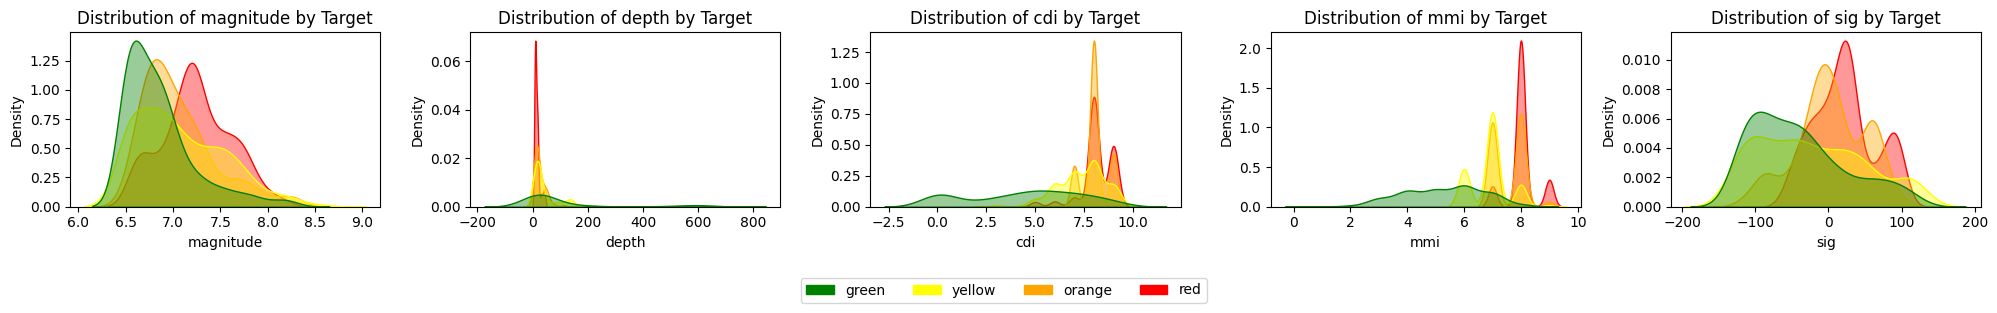

In [30]:
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report
)
from sklearn.ensemble import RandomForestClassifier

# Load data 
csv_path = "./ML-data/10algos/earthquake_alert_balanced_dataset.csv"  
df = pd.read_csv(csv_path)

# Peek at the data
print(df.head())
print("Columns:", list(df.columns))

# Define target variable
df = df.rename(columns={"alert": "target"})
display(df)

# Visualize distributions
custom_palette = {
    "green": "green",
    "yellow": "yellow",
    "orange": "orange",
    "red": "red"
}

num_cols = df.select_dtypes("number").columns[:5]
fig, axes = plt.subplots(1, len(num_cols), figsize=(20, 3))

for i, col in enumerate(num_cols):
    sns.kdeplot(data=df, x=col, hue="target", fill=True, common_norm=False, alpha=0.4, palette=custom_palette, ax=axes[i], legend=False)
    axes[i].set_title(f"Distribution of {col} by Target")

# Custom legend
handles = [mpatches.Patch(color=custom_palette[k], label=k) for k in custom_palette.keys()]
fig.legend(handles=handles, loc="lower center", ncol=len(custom_palette), bbox_to_anchor=(0.5, -0.05))

plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()

### Training the model

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Separate features (X) and target (y)
X = df.drop(columns=["target"]).copy()
y = df["target"].copy()

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Decision Tree model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicting the test set results
y_hat = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_hat)
precision = precision_score(y_test, y_hat, average='macro')
recall = recall_score(y_test, y_hat, average='macro')
f1 = f1_score(y_test, y_hat, average='macro')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1 score: 0.91


### Graphical output

#### Performance of the model: confusion matrix on the test set

<div class="intro">

The confusion matrix displays how many samples were correctly or incorrectly classified. It complements precision and recall by showing how the model performs in detail.
</div>

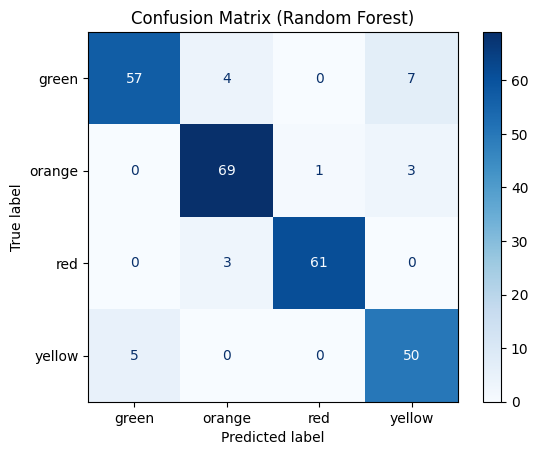

In [32]:
# Confusion matrix 
cm = confusion_matrix(y_test, y_hat, labels=model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix (Random Forest)")
plt.show()

#### Feature importance

<div class="intro">

This barplot shows the weights learned by the random forest classifier model. Higher values indicate increased importance of a feature to the model's prediction. 
</div>


 Important Features:
sig          0.255628
mmi          0.219028
depth        0.187571
magnitude    0.172465
cdi          0.165307
dtype: float64


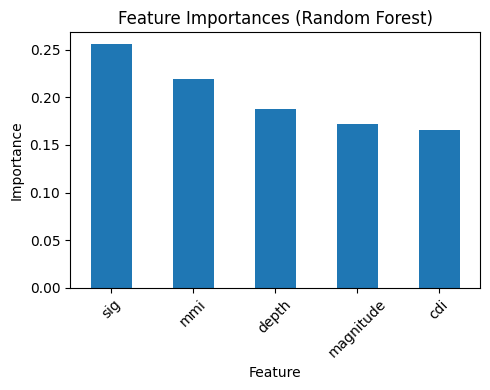

In [33]:
# Feature importance 
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\n Important Features:")
print(importances)

# Barplot of feature importance
plt.figure(figsize=(5, 4))
importances.plot(kind='bar')
plt.title("Feature Importances (Random Forest)")
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## XGBoost

<div class="introT" title="The model">

XGBoost (eXtreme Gradient Boosting) is a supervised ensemble learning algorithm that is used for **both classification and regression** problems. It improves over individual decision trees by combining the results of many trees into a single, stronger model.

XGBoost builds its trees sequentially, where each new tree is trained by looking at the errors of the previous ones. In this way, the model gradually reduces mistakes and improves accuracy. It uses a method called gradient boosting, which simply means it follows the direction that most reduces the error at each step.
</div>
<br>
<div class="introT" title="The database">

The data comes from geological and geochemical analyses of fossil samples. Each entry includes physical, chemical and geological indicators of fossil formation and preservation, such as:

- **Uranium–Lead Ratio** — ratio of uranium to lead isotopes in the fossil sample.  
- **Carbon-14 Ratio** — ratio of carbon-14 isotopes present in the fossil sample.  
- **Radioactive Decay Series** — measurement of the decay process from parent to daughter isotopes.  
- **Stratigraphic Layer Depth** — depth of the fossil within the stratigraphic layer (in meters).  
- **Isotopic Composition** — proportion of different isotopes within the fossil sample.  
- **Fossil Size** — size of the fossil (in centimeters).  
- **Fossil Weight** — weight of the fossil (in grams).  
- **Geological Period** — the geological period during which the fossil was formed.  
- **Surrounding Rock Type** — type of rock in which the fossil is embedded.  
- **Paleomagnetic Data** — orientation data reflecting the Earth’s magnetic field at the fossil site.  
- **Stratigraphic Position** — position of the fossil within the stratigraphic column.  

The target variable is the age of the fossil, expressed in years (continuous variable).

More details about the dataset can be found on [Kaggle: Predict the Age of a Fossil](https://www.kaggle.com/datasets/stealthtechnologies/predict-the-age-of-a-fossil)

</div>

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report
)
import xgboost as xgb

# Load data 
csv_path = "./ML-data/10algos/FossilAge_data.csv"  
df = pd.read_csv(csv_path)

# Peek at the data
print(df.head())
print("Columns:", list(df.columns))

# Define target variable
df = df.rename(columns={"age": "target"})
display(df)

   uranium_lead_ratio  carbon_14_ratio  radioactive_decay_series  \
0            0.738061         0.487707                  0.907884   
1            0.560096         0.341738                  1.121302   
2            0.424773         0.218493                  0.103855   
3            0.349958         0.704649                  0.383617   
4            0.886811         0.777494                  0.593254   

   stratigraphic_layer_depth geological_period paleomagnetic_data  \
0                      91.17        Cretaceous    Normal polarity   
1                     165.44          Cambrian    Normal polarity   
2                     218.98          Cambrian    Normal polarity   
3                      51.09           Permian    Normal polarity   
4                     313.72          Devonian    Normal polarity   

   inclusion_of_other_fossils  isotopic_composition surrounding_rock_type  \
0                       False              0.915951          Conglomerate   
1                     

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,geological_period,paleomagnetic_data,inclusion_of_other_fossils,isotopic_composition,surrounding_rock_type,stratigraphic_position,fossil_size,fossil_weight,target
0,7.380612e-01,0.487707,0.907884,91.17,Cretaceous,Normal polarity,False,0.915951,Conglomerate,Middle,50.65,432.00,43523
1,5.600962e-01,0.341738,1.121302,165.44,Cambrian,Normal polarity,False,0.803968,Limestone,Top,48.85,353.29,44112
2,4.247728e-01,0.218493,0.103855,218.98,Cambrian,Normal polarity,True,0.792441,Shale,Bottom,37.66,371.33,43480
3,3.499581e-01,0.704649,0.383617,51.09,Permian,Normal polarity,True,0.074636,Limestone,Bottom,39.10,232.84,30228
4,8.868112e-01,0.777494,0.593254,313.72,Devonian,Normal polarity,True,1.646640,Shale,Top,90.84,277.67,67217
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5493,9.310413e-01,0.605897,0.084256,305.88,Jurassic,Normal polarity,False,1.420604,Limestone,Bottom,71.73,457.19,75666
5494,1.728146e-01,0.735722,0.256501,74.91,Cretaceous,Normal polarity,False,1.060878,Shale,Top,90.10,231.71,17040
5495,1.162916e-01,0.328385,0.757881,178.98,Triassic,Normal polarity,True,0.756099,Sandstone,Middle,112.89,447.29,19337
5496,1.998150e-01,0.185976,0.461915,107.01,Triassic,Normal polarity,True,0.564300,Sandstone,Top,105.78,262.51,18526


<div class="rqE">

This dataset contains both **numerical** and **categorical** variables.

</div>
<br>
<div class="introT">

- For **numerical features**, we compute linear correlation coefficients aiming to identify potential trends and relationships.  
- For **categorical features**, correlations with the target are explored through **visualizations such as strip plots**, which make it easier to spot patterns across categories.  

</div>

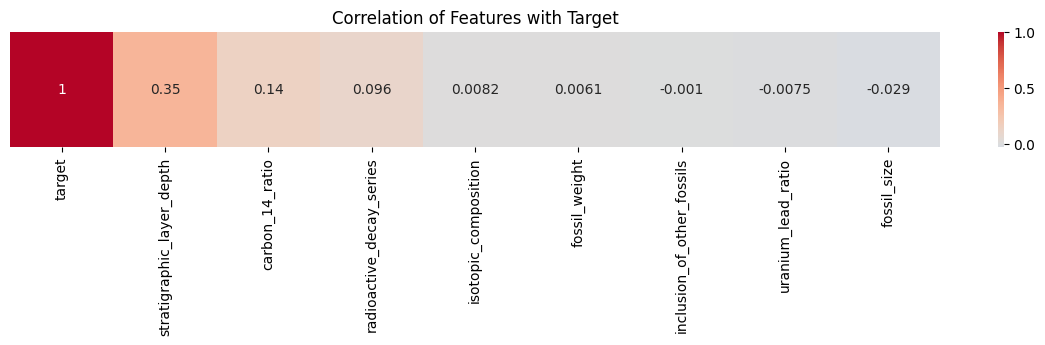

In [31]:
# Compute correlation matrix (numeric features only)
corr = df.corr(numeric_only=True)

# Select only the last row (target correlations)
target_corr = corr.loc["target"].sort_values(ascending=False)

plt.figure(figsize=(15, 1.5))
sns.heatmap(
    target_corr.to_frame().T, 
    annot=True, 
    cmap="coolwarm", 
    center=0, 
    cbar=True
)
plt.title("Correlation of Features with Target")
plt.yticks([])
plt.show()

Categorical columns: ['geological_period', 'paleomagnetic_data', 'surrounding_rock_type', 'stratigraphic_position']


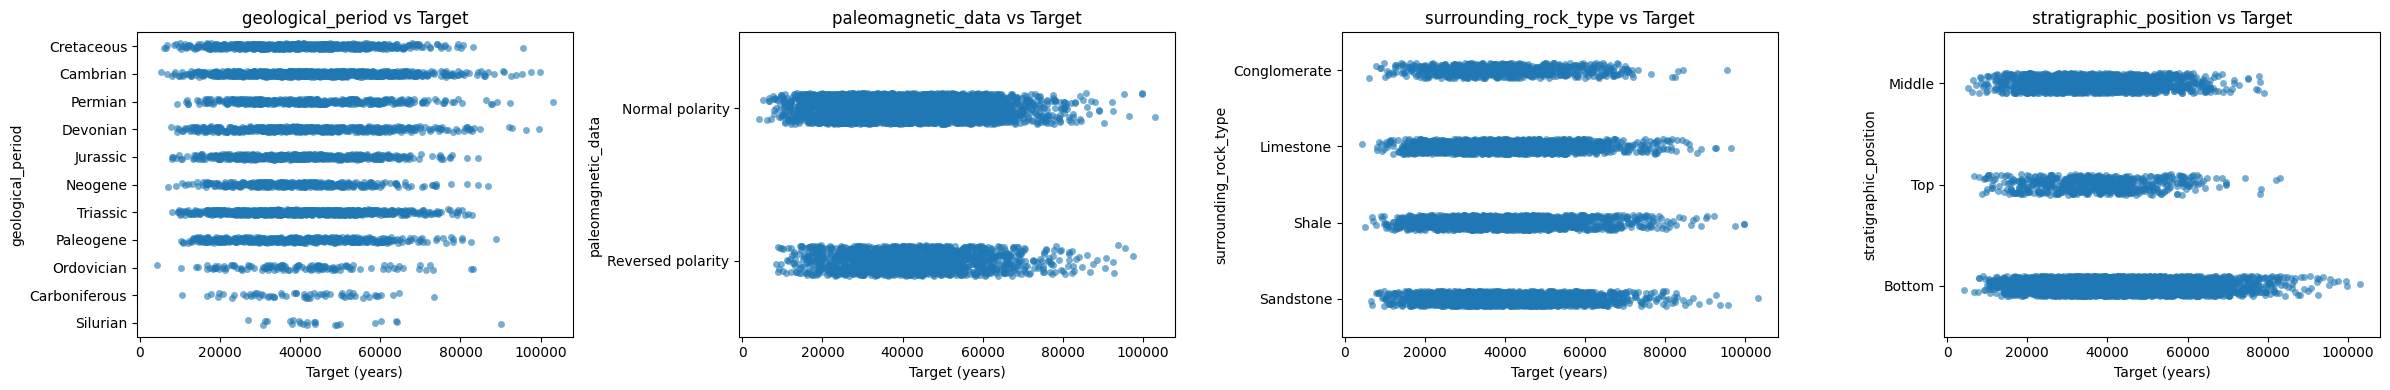

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
print("Categorical columns:", cat_cols)

fig, axes = plt.subplots(1, len(cat_cols), figsize=(6*len(cat_cols), 4), sharex=True)

for i, col in enumerate(cat_cols):
    sns.stripplot(
        data=df,
        x="target",
        y=col,
        jitter=True,
        alpha=0.6,
        legend=False,
        ax=axes[i]
    )
    axes[i].set_title(f"{col} vs Target")
    axes[i].set_xlabel("Target (years)")
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


### Training the model

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Separate features (X) and target (y)
X = df.drop(columns=["target"]).copy()
y = df["target"].copy()

cat_cols = X.select_dtypes(include=["object", "category"]).columns
for c in cat_cols:
    X[c] = X[c].astype("category")

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost Regressor with native categoricals 
model = xgb.XGBRegressor(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    enable_categorical=True,
    random_state=42
)
model.fit(X_train, y_train)

# Predicting the test set results
y_hat = model.predict(X_test)
mae  = mean_absolute_error(y_test, y_hat)
r2   = r2_score(y_test, y_hat)

print(f"MAE : {mae:.2f}")
print(f"R2  : {r2:.2f}")

MAE : 1173.53
R2  : 0.99


### Graphical output

#### Performance of the model on the test set

<div class="intro">

Plotting the **actual values against the predicted values** shows how closely the model’s predictions match reality; with perfect performance, all points would lie exactly on the diagonal line.

Plotting the **residuals against the predicted values** helps reveal bias or systematic errors; ideally, the residuals should be randomly scattered around zero without any clear pattern.

Plotting the **distribution of residuals** shows how the error is spread; in a well-performing model, the residuals should be centered around zero and roughly symmetric.

</div>

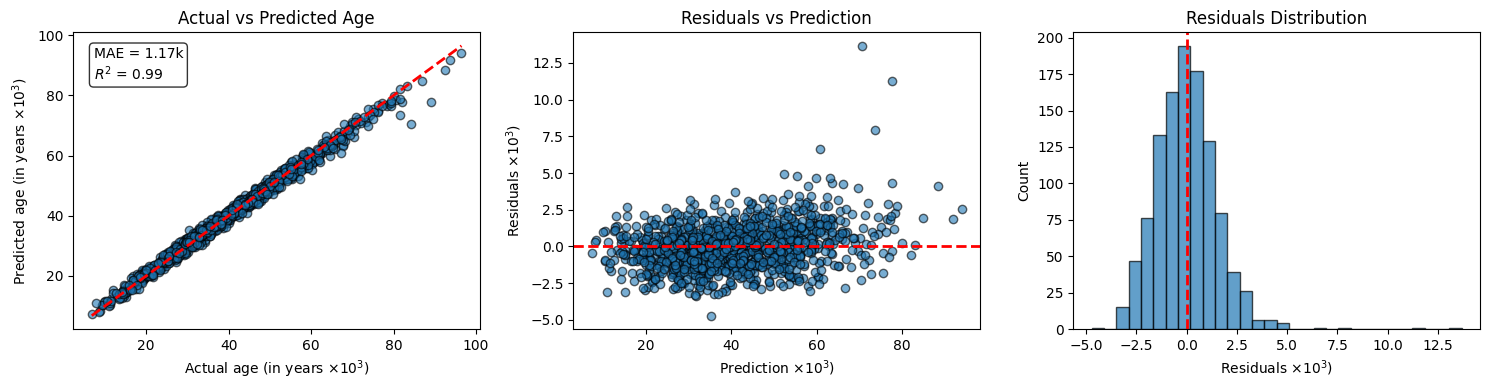

In [34]:
import matplotlib.pyplot as plt

# Scale values to thousands
y_test_sc = y_test / 1e3
y_hat_sc = y_hat / 1e3
residuals_sc = (y_test - y_hat) / 1e3

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# --- 1. Actual vs Predicted ---
axes[0].scatter(y_test_sc, y_hat_sc, alpha=0.6, edgecolor="k")
axes[0].plot([y_test_sc.min(), y_test_sc.max()],
             [y_test_sc.min(), y_test_sc.max()],
             "r--", lw=2)
axes[0].set_xlabel(r"Actual age (in years $\times 10^3$)")
axes[0].set_ylabel(r"Predicted age (in years $\times 10^3$)")
axes[0].set_title("Actual vs Predicted Age")

# Add metrics in a text box
textstr = f"MAE = {mae/1e3:.2f}k\n$R^2$ = {r2:.2f}"
axes[0].text(
    0.05, 0.95, textstr,
    transform=axes[0].transAxes,
    fontsize=10,
    verticalalignment="top",
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8)
)

# --- 2. Residuals vs Predicted ---
axes[1].scatter(y_hat_sc, residuals_sc, alpha=0.6, edgecolor="k")
axes[1].axhline(0, color="red", linestyle="--", lw=2)
axes[1].set_xlabel(r"Prediction $\times 10^3$)")
axes[1].set_ylabel(r"Residuals $\times 10^3$)")
axes[1].set_title("Residuals vs Prediction")

# --- 3. Histogram of Residuals ---
axes[2].hist(residuals_sc, bins=30, edgecolor="k", alpha=0.7)
axes[2].axvline(0, color="red", linestyle="--", lw=2)
axes[2].set_xlabel(r"Residuals $\times 10^3$)")
axes[2].set_ylabel("Count")
axes[2].set_title("Residuals Distribution")

plt.tight_layout()
plt.show()


#### Feature importance

<div class="intro">

This barplot shows the weights learned by the XGBoost regressor. Higher values indicate increased importance of a feature to the model's prediction. 
</div>


Top 5 features:
uranium_lead_ratio           0.604505
stratigraphic_position       0.190880
stratigraphic_layer_depth    0.110015
paleomagnetic_data           0.021795
carbon_14_ratio              0.017236
dtype: float32


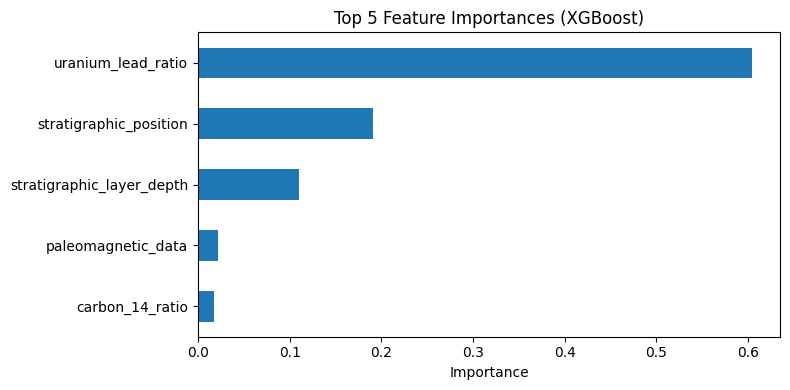

In [35]:
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 5 features:")
print(importances.head(5))

plt.figure(figsize=(8,4))
importances.head(5).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top 5 Feature Importances (XGBoost)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

## SVM

<div class="introT" title="The model">

Support Vector Machine (SVM) is a supervised learning algorithm used for **both classification and regression** tasks.  
It works by finding the best boundary (called a hyperplane) that separates the classes in the data. The goal is to maximize the margin, meaning the distance between the boundary and the closest data points.

SVM can also handle cases where the data is not linearly separable by using **kernels**, which map the data into a higher-dimensional space to find a clearer separation.

Some key hyperparameters are:
- **C**: controls how strict the boundary is. A small `C` allows more misclassifications for a smoother margin, while a large `C` tries to classify every point correctly.  
- **kernel**: defines the type of transformation (e.g., `"linear"`, `"rbf"`, `"poly"`) to separate data that isn’t linearly separable.  
- **gamma**: (for `"rbf"` or `"poly"`) controls how far the influence of a single training point reaches. Low values = smoother decision boundary; high values = more complex boundaries.
</div>

#### Simple visual representation of the kernel trick

<div class="introT">
The original data are not linearly separable, but they become linearly separable when they are passed to higher dimensions.
</div>

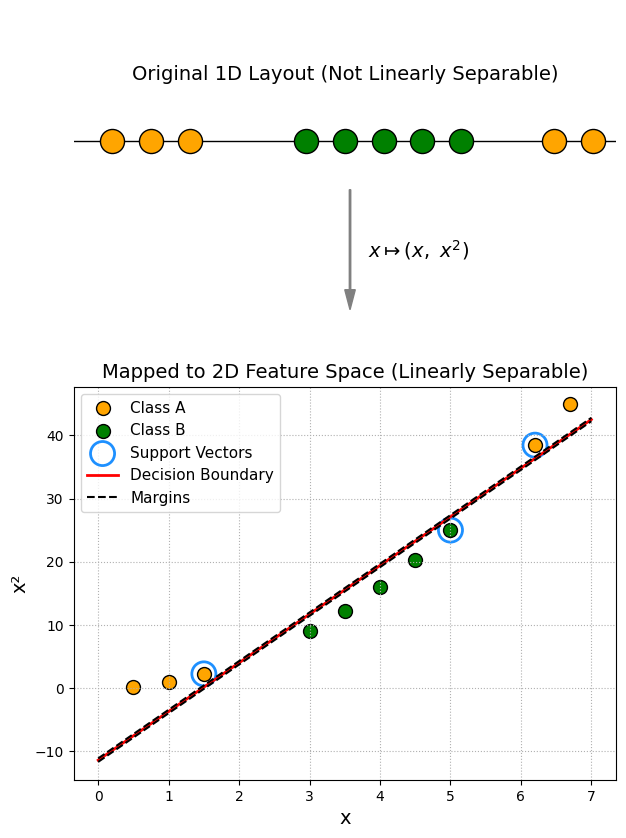

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrow
from sklearn.svm import SVC

# Original 1D data: non-linearly separable
orange_1d = np.array([0.5, 1.0, 1.5, 6.2, 6.7])
green_1d = np.array([3.0, 3.5, 4.0, 4.5, 5.0])
X_1d = np.concatenate((orange_1d, green_1d))
y = np.array([0]*len(orange_1d) + [1]*len(green_1d))  # 0 = orange, 1 = green

# Map to 2D: phi(x) = [x, x^2]
X_2d = np.vstack([X_1d, X_1d**2]).T

# Train linear SVM on transformed data
clf = SVC(kernel='linear', C=100)
clf.fit(X_2d, y)

# SVM parameters
w = clf.coef_[0]
b = clf.intercept_[0]
margin = 1 / np.linalg.norm(w)

# Create mesh for decision boundary
x_plot = np.linspace(0, 7, 500)
X_plot = np.vstack([x_plot, x_plot**2]).T
boundary = - (w[0] * x_plot + b) / w[1]
margin_up = boundary + margin
margin_down = boundary - margin

# Set up figure and vertical layout
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 10), height_ratios=[1, 1.5])

# --- 1D Plot ---
ax1.plot([0, 7], [0, 0], color='black', linewidth=1)
ax1.scatter(orange_1d, np.zeros_like(orange_1d), color='orange', s=300, edgecolor='k', zorder=3, label='Class A')
ax1.scatter(green_1d, np.zeros_like(green_1d), color='green', s=300, edgecolor='k', zorder=3, label='Class B')
ax1.set_ylim(-0.5, 0.5)
ax1.set_xlim(0, 7)
ax1.set_yticks([])
ax1.set_xticks([])
ax1.set_title('Original 1D Layout (Not Linearly Separable)', fontsize=14, y=0.7)
ax1.axis('off')

# --- 2D Plot ---
ax2.scatter(X_2d[y==0][:, 0], X_2d[y==0][:, 1], color='orange', edgecolor='k', s=100, label='Class A')
ax2.scatter(X_2d[y==1][:, 0], X_2d[y==1][:, 1], color='green', edgecolor='k', s=100, label='Class B')
ax2.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, facecolors='none', edgecolors='dodgerblue', linewidths=2, label='Support Vectors')
ax2.plot(x_plot, boundary, 'r-', linewidth=2, label='Decision Boundary')
ax2.plot(x_plot, margin_up, 'k--', linewidth=1.5, label='Margins')
ax2.plot(x_plot, margin_down, 'k--', linewidth=1.5)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('x²', fontsize=14)
ax2.set_title('Mapped to 2D Feature Space (Linearly Separable)', fontsize=14)
ax2.legend(loc='upper left', fontsize=11)
ax2.grid(True, linestyle=':')

# Draw vertical arrow between subplots 
fig.subplots_adjust(hspace=0.35)
fig_width, fig_height = fig.get_size_inches()

arrow_x = 0.52 
arrow_y_start = 0.70  
arrow_y_end = 0.58   
# Arrow
fig.patches.append(FancyArrow(
    arrow_x, arrow_y_start,
    0, arrow_y_end - arrow_y_start,
    width=0.002, head_width=0.015, head_length=0.02,
    length_includes_head=True, transform=fig.transFigure, color='gray'))

# Text label
fig.text(arrow_x + 0.025, (arrow_y_start + arrow_y_end)/2,
         r"$x \mapsto (x,\ x^2)$", fontsize=14, ha='left', va='center')
plt.savefig('SVM_1D2Dkernel.png')

plt.show()


<div class="introT" title="The database">

The dataset contains 60 synthetic records representing chemical composition of Ceylon cinnamon samples, described by:

- **Moisture (%)** 
- **Ash (%)**   
- **Volatile Oil (%)** 


The target variable is the quality label: High, Medium, Low.

More details about the dataset can be found on [Kaggle: Cinnamon Quality Classification ](https://www.kaggle.com/datasets/madaraweerasingha/cinnamon-quality-classification)

</div>

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report
)

# Load data 
csv_path = "./ML-data/10algos/balanced_cinnamon_quality_dataset.csv"  
df = pd.read_csv(csv_path)

# Peek at the data
print(df.head())
print("Columns:", list(df.columns))

# Define target variable
df = df.rename(columns={"Quality_Label": "target"})
df=df.drop(["Sample_ID"],axis=1)           #drop the Sample_ID column. It is not informative.
display(df.head(10))

  Sample_ID  Moisture (%)  Ash (%)  Volatile_Oil (%) Quality_Label
0      H001         10.56     5.93              1.24          High
1      H002         11.43     5.60              1.35          High
2      H003         11.10     5.70              1.21          High
3      H004         10.90     5.76              1.47          High
4      H005         10.23     5.82              1.28          High
Columns: ['Sample_ID', 'Moisture (%)', 'Ash (%)', 'Volatile_Oil (%)', 'Quality_Label']


,Moisture (%),Ash (%),Volatile_Oil (%),target
0,10.56,5.93,1.24,High
1,11.43,5.60,1.35,High
2,11.10,5.70,1.21,High
3,10.90,5.76,1.47,High
4,10.23,5.82,1.28,High
5,10.23,6.05,1.40,High
6,10.09,5.64,1.29,High
7,11.30,5.86,1.36,High
8,10.90,5.91,1.36,High
9,11.06,5.53,1.26,High


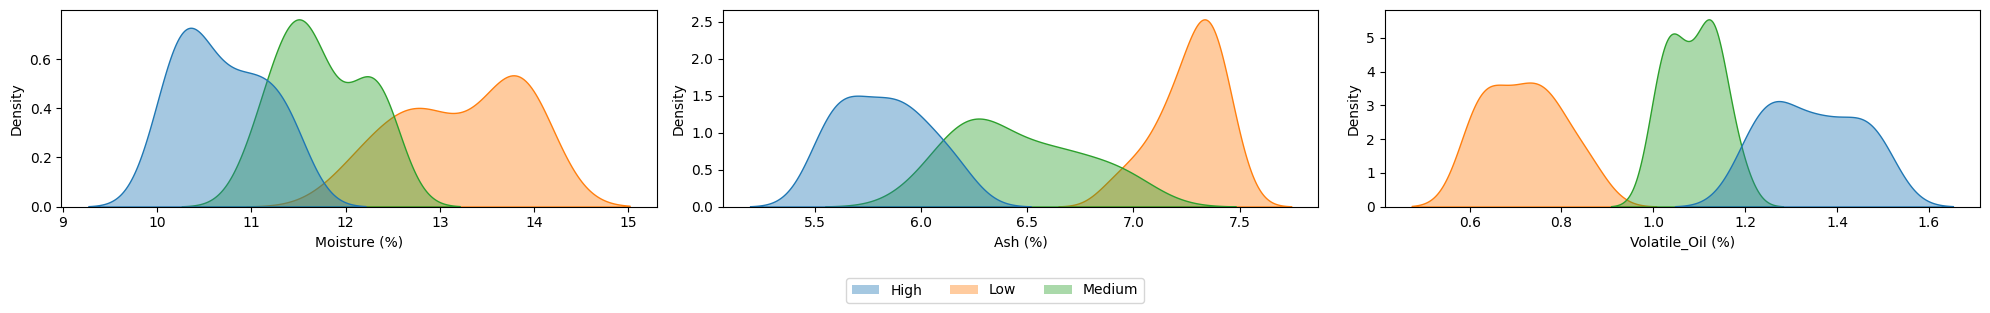

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.patches import Patch

num_cols = df.select_dtypes("number").columns[:]
fig, axes = plt.subplots(1, len(num_cols), figsize=(20, 3))

# unique target classes
classes = list(pd.Categorical(df["target"]).categories)

# get consistent colors from seaborn
palette = sns.color_palette(n_colors=len(classes))
color_dict = dict(zip(classes, palette))

for i, col in enumerate(num_cols):
    sns.kdeplot(data=df, x=col, hue="target", fill=True, common_norm=False, alpha=0.4, ax=axes[i], legend=False, palette=color_dict)

# build custom legend with matching colors
handles = [Patch(facecolor=color_dict[c], alpha=0.4, label=str(c)) for c in classes]

fig.legend(
    handles=handles,
    labels=classes,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.05),
    ncol=len(classes)
)

plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()


### Data standardization

<div class="intro">
    
Many machine learning models work best when the input features are on a similar scale.  
For example, if one feature is measured in thousands (like salary) and another in decimals (like height in meters), the large numbers can dominate the learning process.

`StandardScaler` helps by transforming each feature so that:

- The **mean** becomes `0`
- The **standard deviation** becomes `1`

This means every feature is centered and scaled, making them easier to compare and ensuring that models like SVMs treat all features fairly.

</div>

,Moisture (%),Ash (%),Volatile_Oil (%)
count,48.000000,48.000000,48.000000
mean,11.841458,6.470417,1.069167
std,1.142696,0.635673,0.248620
min,10.030000,5.530000,0.610000
25%,11.047500,5.925000,0.845000
50%,11.590000,6.280000,1.105000
75%,12.502500,7.045000,1.260000
max,13.930000,7.490000,1.490000


,Moisture (%),Ash (%),Volatile_Oil (%)
count,4.800000e+01,4.800000e+01,4.800000e+01
mean,-2.220446e-16,-1.683838e-15,2.960595e-16
std,1.010582e+00,1.010582e+00,1.010582e+00
min,-1.602026e+00,-1.495058e+00,-1.866403e+00
25%,-7.021645e-01,-8.670937e-01,-9.111841e-01
50%,-2.223859e-01,-3.027210e-01,1.456540e-01
75%,5.846150e-01,9.134624e-01,7.756920e-01
max,1.847074e+00,1.620916e+00,1.710587e+00


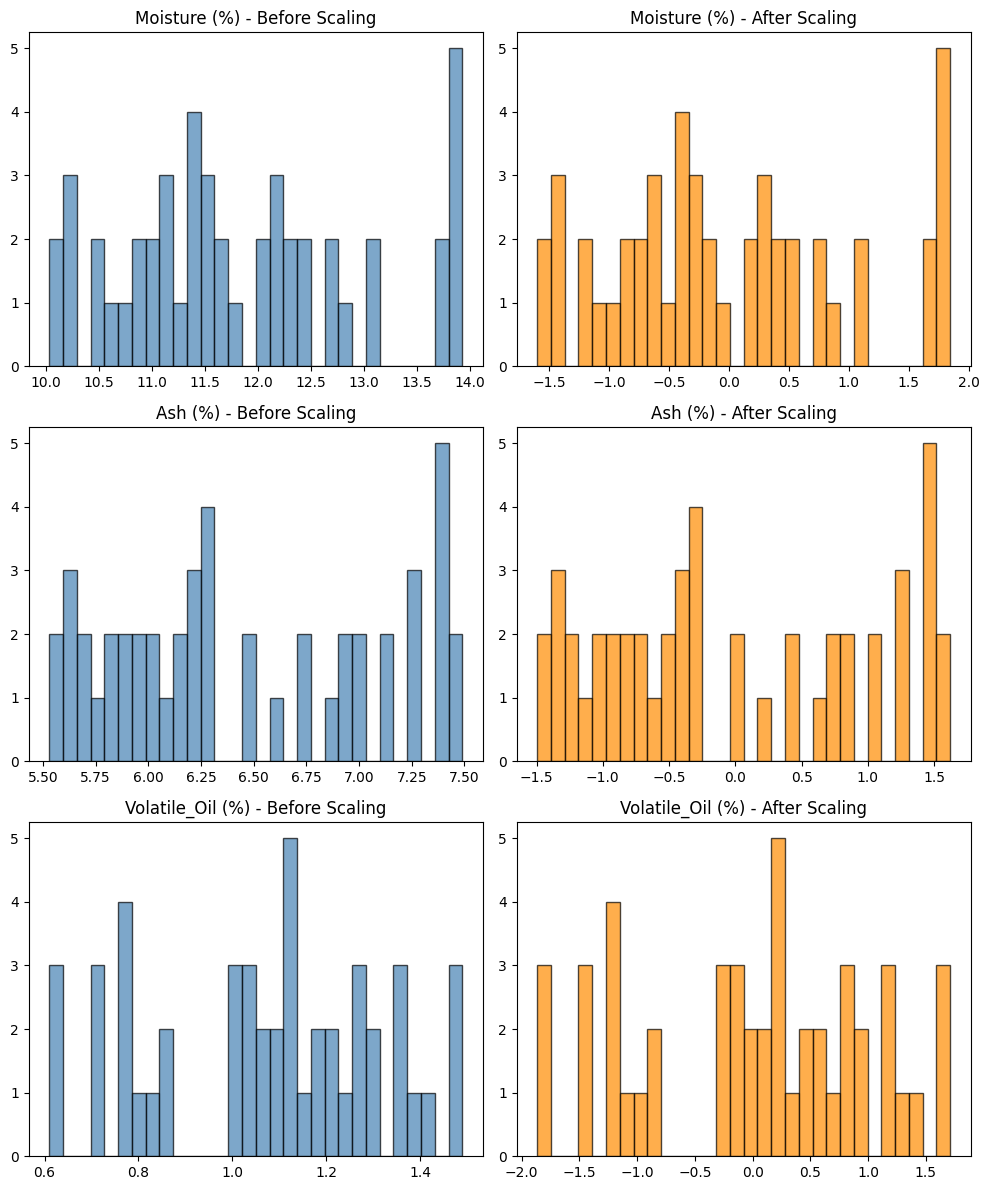

In [41]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

X = df.drop(columns=["target"]).copy()
y = df["target"].copy()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, 
)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

display(X_train.describe())
display(pd.DataFrame(X_train_scaled, columns=X_train.columns).describe())

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

num_cols = X_train.columns
n_rows = len(num_cols)

fig, axes = plt.subplots(n_rows, 2, figsize=(10, 4*n_rows))

for i, col in enumerate(num_cols):
    # Histogram before scaling
    axes[i, 0].hist(X_train[col], bins=30, alpha=0.7, color="steelblue", edgecolor="black")
    axes[i, 0].set_title(f"{col} - Before Scaling")
    
    # Histogram after scaling
    axes[i, 1].hist(X_train_scaled_df[col], bins=30, alpha=0.7, color="darkorange", edgecolor="black")
    axes[i, 1].set_title(f"{col} - After Scaling")

plt.tight_layout()
plt.show()

### Training the model

In [42]:
from sklearn.svm import SVC

model = SVC(kernel="rbf", C=0.065, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

Accuracy: 0.92
Precision: 0.89
Recall: 0.92
F1 score: 0.89


### Graphical output

#### Performance of the model: confusion matrix on the test set

<div class="intro">

The confusion matrix displays how many samples were correctly or incorrectly classified. It complements precision and recall by showing how the model performs in detail.
</div>

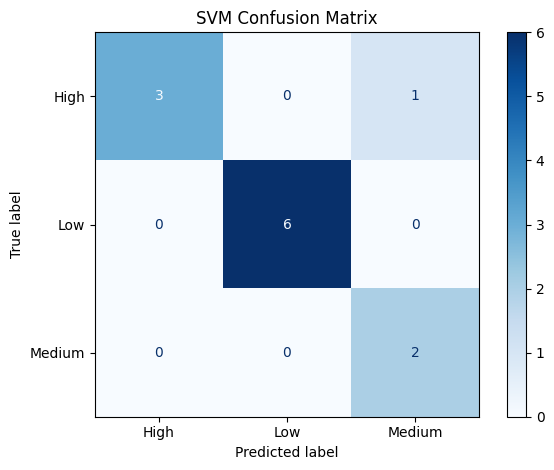

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot(cmap="Blues", values_format="d")
plt.title("SVM Confusion Matrix")
plt.tight_layout()
plt.show()

<div class="rq", title="Note">

The model is trained on **only 48** samples. Although ML models generally require lots of data, algorithms like SVM can perform efficiently on small data regimes. 

</div>

## KNN

<div class="introT" title="The model">

**K-Nearest Neighbors (KNN)** is a classification algorithm that predicts the label of a new data point by looking at the **`k` closest points** in the training set.  

The class most common among these neighbors is assigned to the new point.  
Distance (often Euclidean) is used to measure how close points are.  

👉 In practice, you can use **`sklearn.neighbors.KNeighborsClassifier`**, for example:  
`KNeighborsClassifier(n_neighbors=3)`


<p style="text-align:center;">
    <img src="./ML-Figures/10algos/knn_illustration.png" alt="Alt text" width="500"/>
</p>

</div>
<br>
<div class="introT" title="The database">

The dataset contains 240 records describing different types of stars.  
Features include:  

- **Absolute Temperature (K)**  
- **Relative Luminosity (L/Lo)**  
- **Relative Radius (R/Ro)**  
- **Absolute Magnitude (Mv)**  
- **Star Color** (e.g., White, Red, Blue)  
- **Spectral Class** (O, B, A, F, G, K, M)  

The target variable is the **Star Type**, encoded as:  

- **0 → Brown Dwarf**  
- **1 → Red Dwarf**  
- **2 → White Dwarf**  
- **3 → Main Sequence**  
- **4 → Supergiant**  
- **5 → Hypergiant**  

More details about the dataset can be found on [Kaggle: Star Classification Dataset](https://www.kaggle.com/datasets/deepu1109/star-dataset)
</div>

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report
)

# Load data 
csv_path = "./ML-data/10algos/star_types.csv"  
df = pd.read_csv(csv_path)

# Peek at the data
print(df.head())
print("Columns:", list(df.columns))

# Define target variable
df = df.rename(columns={"Star type": "target"})
df

   Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068          0.002400        0.1700                   16.12   
1             3042          0.000500        0.1542                   16.60   
2             2600          0.000300        0.1020                   18.70   
3             2800          0.000200        0.1600                   16.65   
4             1939          0.000138        0.1030                   20.06   

  Star color Spectral Class  Star type  
0        Red              M          0  
1        Red              M          0  
2        Red              M          0  
3        Red              M          0  
4        Red              M          0  
Columns: ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star color', 'Spectral Class', 'Star type']


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class,target
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


<div class="rqE">

This dataset contains both **numerical** and **categorical** variables.

</div>

Categorical columns: ['Star color', 'Spectral Class']


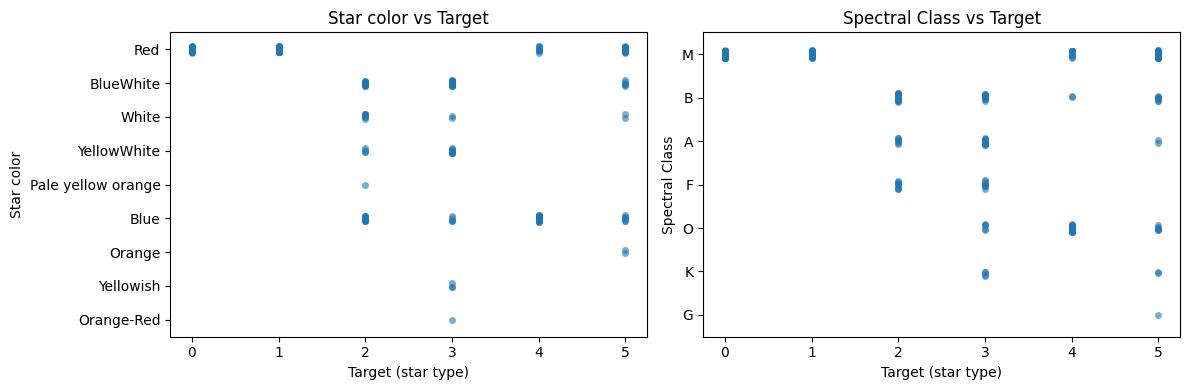

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
print("Categorical columns:", cat_cols)

fig, axes = plt.subplots(1, len(cat_cols), figsize=(6*len(cat_cols), 4), sharex=True)

for i, col in enumerate(cat_cols):
    sns.stripplot(
        data=df,
        x="target",
        y=col,
        jitter=True,
        alpha=0.6,
        legend=False,
        ax=axes[i]
    )
    axes[i].set_title(f"{col} vs Target")
    axes[i].set_xlabel("Target (star type)")
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

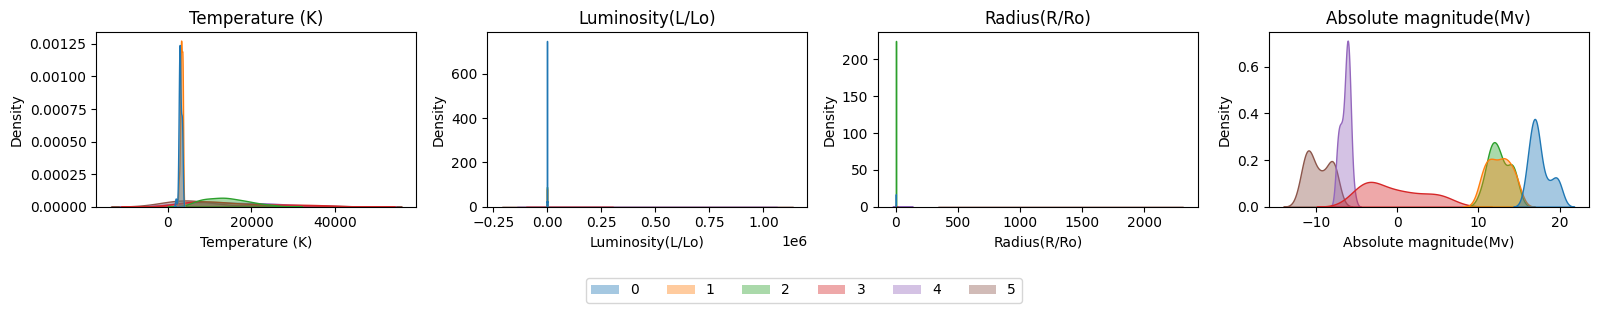

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.patches import Patch
from sklearn.preprocessing import StandardScaler

df["target"] = pd.Categorical(df["target"])

# --- pick numeric feature columns EXCLUDING target ---
num_cols = [c for c in df.select_dtypes(include="number").columns if c != "target"]

# --- setup subplots (robust to a single column) ---
n = len(num_cols)
fig, axes = plt.subplots(1, n, figsize=(max(5, 4*n), 3))
if n == 1:
    axes = [axes]  # make it iterable

# --- consistent colors by class ---
classes = list(df["target"].cat.categories)
palette = sns.color_palette(n_colors=len(classes))
color_dict = dict(zip(classes, palette))

# --- KDE plots on standardized features ---
for i, col in enumerate(num_cols):
    sns.kdeplot(
        data=df,
        x=col,
        hue="target",
        fill=True,
        common_norm=False,
        alpha=0.4,
        ax=axes[i],
        legend=False,
        palette=color_dict
    )
    axes[i].set_title(col)

# --- custom legend matching colors ---
handles = [Patch(facecolor=color_dict[c], alpha=0.4, label=str(c)) for c in classes]
fig.legend(
    handles=handles,
    labels=classes,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.05),
    ncol=len(classes)
)

plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()


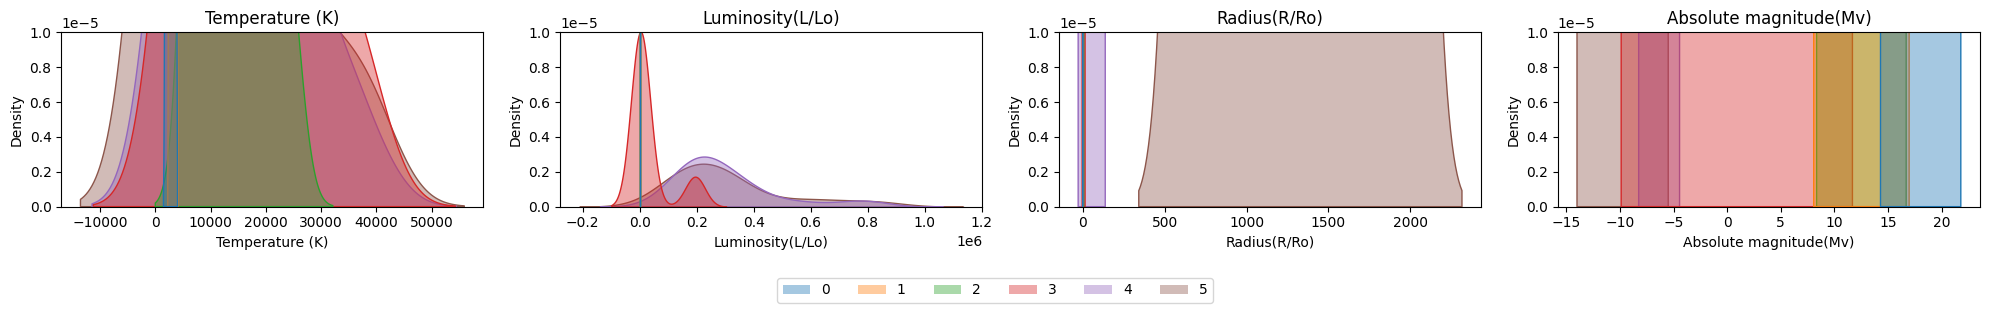

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.patches import Patch
from sklearn.preprocessing import StandardScaler
import numpy as np

# categorical target + standardization
df_plot = df.copy()
df["target"] = pd.Categorical(df["target"])
df_plot["target"] = pd.Categorical(df_plot["target"])
num_cols = [c for c in df_plot.select_dtypes(include="number").columns if c != "target"]

scaler = StandardScaler()
df_plot[num_cols] = scaler.fit_transform(df_plot[num_cols])


n = len(num_cols)
fig, axes = plt.subplots(1, n, figsize=(max(5, 5*n), 3))
if n == 1:
    axes = [axes]

# ---- colors by class ----
classes = list(df["target"].cat.categories)
palette = sns.color_palette(n_colors=len(classes))
color_dict = dict(zip(classes, palette))

# ---- plot once ----
for i, col in enumerate(num_cols):
    ax = axes[i]
    sns.kdeplot(
        data=df,
        x=col,
        hue="target",
        fill=True,
        common_norm=False,
        alpha=0.4,
        ax=ax,
        legend=False,
        palette=color_dict
    )
    ax.set_title(col)

# ---- compute global max density from the lines we just drew ----
all_lines = [line for ax in axes for line in ax.lines]
if all_lines:
    global_max = max(np.nanmax(line.get_ydata()) for line in all_lines)
else:
    global_max = 1.0  # fallback

# choose how much to “cut” the tallest peak: e.g., keep 85%
cut_level = 0.00001
ylim_max = max(1e-6, global_max * cut_level)

for ax in axes:
    ax.set_ylim(0, ylim_max)

# ---- legend ----
handles = [Patch(facecolor=color_dict[c], alpha=0.4, label=str(c)) for c in classes]
fig.legend(
    handles=handles,
    labels=classes,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.05),
    ncol=len(classes)
)

plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()


### Data standardization

<div class="intro">
    
Many machine learning models work best when the input features are on a similar scale.  
For example, if one feature is measured in thousands (like salary) and another in decimals (like height in meters), the large numbers can dominate the learning process.

`StandardScaler` helps by transforming each feature so that:

- The **mean** becomes `0`
- The **standard deviation** becomes `1`

This means every feature is centered and scaled, making them easier to compare and ensuring that models treat all features fairly.

</div>

### One Hot Encoding

<div class="intro">

One-Hot Encoding (OHE) is a method to convert **categorical variables** (like `"Red"`, `"Green"`, `"Blue"`) into a numerical format that machine learning models can use.  

Instead of assigning numbers directly (e.g., Red=0, Green=1, Blue=2), which would imply an **order or magnitude** that doesn’t exist, OHE creates a new binary column for **each category**:

| Color   | OHE: Red | OHE: Green | OHE: Blue |
|---------|----------|------------|-----------|
| Red     |    1     |     0      |     0     |
| Green   |    0     |     1      |     0     |
| Blue    |    0     |     0      |     1     |
| Red     |    1     |     0      |     0     |

✨ Each row has exactly one `1` (the category present) and the rest are `0`s.  

This ensures that categorical data is represented **without introducing false numerical relationships** between categories.

👉 In practice, you can do One-Hot Encoding with **`OneHotEncoder` from scikit-learn**, which is especially useful inside machine learning pipelines.

</div>

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# --- split features/target ---
X = df.drop(columns=["target"]).copy()
y = df["target"].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- separate numeric vs categorical ---
num_cols = X_train.select_dtypes(include="number").columns.tolist()
cat_cols = X_train.select_dtypes(exclude="number").columns.tolist()

# --- one-hot encode categoricals with sklearn ---
ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")  
# sparse=False → returns numpy array, handle_unknown="ignore" → avoids errors if test has unseen categories

X_train_cat = pd.DataFrame(
    ohe.fit_transform(X_train[cat_cols]),
    index=X_train.index,
    columns=ohe.get_feature_names_out(cat_cols)
)

X_test_cat = pd.DataFrame(
    ohe.transform(X_test[cat_cols]),
    index=X_test.index,
    columns=ohe.get_feature_names_out(cat_cols)
)

# --- scale numeric features only ---
scaler = StandardScaler()
X_train_num = pd.DataFrame(
    scaler.fit_transform(X_train[num_cols]),
    index=X_train.index,
    columns=num_cols
)

X_test_num = pd.DataFrame(
    scaler.transform(X_test[num_cols]),
    index=X_test.index,
    columns=num_cols
)

# --- combine numeric + categorical back ---
X_train = pd.concat([X_train_num, X_train_cat], axis=1)
X_test = pd.concat([X_test_num, X_test_cat], axis=1)

# --- ensure target is categorical ---
y_train = pd.Categorical(y_train)
y_test = pd.Categorical(y_test)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (192, 20)
Test shape: (48, 20)


#### Take a look at the One-Hot encoded training set

In [51]:
X_train

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color_Blue,Star color_BlueWhite,Star color_Orange,Star color_Orange-Red,Star color_Pale yellow orange,Star color_Red,Star color_White,Star color_YellowWhite,Star color_Yellowish,Spectral Class_A,Spectral Class_B,Spectral Class_F,Spectral Class_G,Spectral Class_K,Spectral Class_M,Spectral Class_O
91,-0.614764,-0.589442,-0.458660,0.205587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,0.552616,-0.589443,-0.460331,0.753577,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
237,-0.134347,2.568902,2.325206,-1.444510,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
123,-0.768837,-0.589443,-0.460171,1.202576,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
150,2.180204,0.515257,-0.448569,-0.801167,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,0.230850,0.115685,0.927337,-1.167834,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
196,-0.769283,-0.589443,-0.459848,0.934517,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145,-0.123741,-0.589443,-0.460336,1.006318,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
229,1.306902,3.811085,-0.280261,-1.120541,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Principal Component Analysis (PCA)
<div class="intro">
    
**Principal Component Analysis (PCA)** is a dimensionality reduction technique.  
It transforms your dataset into a new set of features called **principal components**, which are:

- Linear combinations of the original features  
- Ordered by how much **variance** (information) they capture  
- Always orthogonal (uncorrelated) to each other  

Typically, the **first principal component (PC1)** captures the most variance in the data,  
the **second (PC2)** captures the next most, and so on.  

This is very useful when you have many features and want to:  
- Visualize high-dimensional data in 2D or 3D  
- Reduce noise and redundancy  
- Speed up machine learning models  

👉 In practice, you can perform PCA with **`sklearn.decomposition.PCA`**, for example:  
`PCA(n_components=2)` to reduce the dataset to 2 dimensions for plotting.

</div>

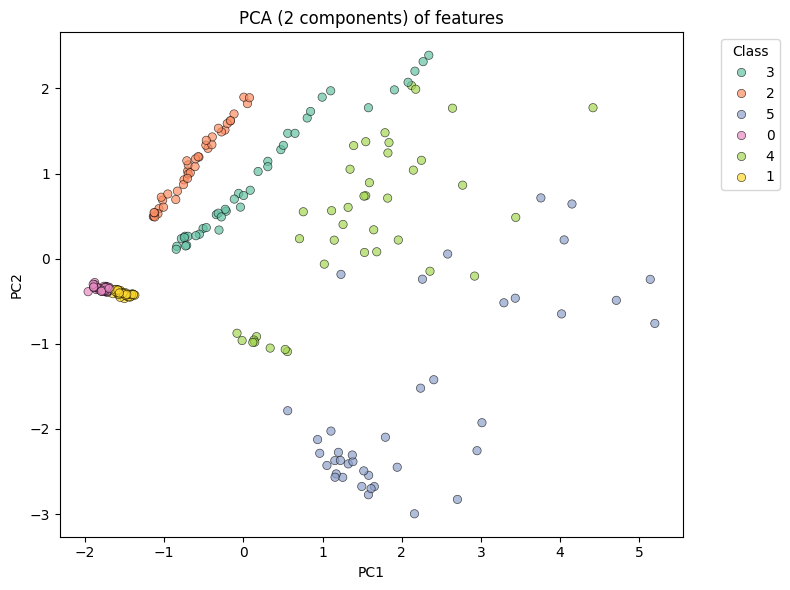

In [52]:
from sklearn.decomposition import PCA

X_full = pd.concat([X_train, X_test], axis=0)
y_full = pd.concat([pd.Series(y_train), pd.Series(y_test)], axis=0)

# --- PCA to 2 components ---
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_full)

# --- Build a plotting dataframe ---
df_pca = pd.DataFrame({
    "PC1": X_pca[:, 0],
    "PC2": X_pca[:, 1],
    "target": y_full.astype(str)  # convert categorical to string for coloring
})

# --- Plot ---
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_pca,
    x="PC1", y="PC2",
    hue="target",
    palette="Set2",
    alpha=0.7,
    edgecolor="k"
)
plt.title("PCA (2 components) of features")
plt.legend(title="Class", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

<div class="rqE">

Most data points form clear clusters. There is possible overlap between classes 3 - 4 and 4 - 5.

</div>

### Training the model

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=4)  
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

Accuracy: 0.96
Precision: 0.97
Recall: 0.96
F1 score: 0.96


### Graphical output

#### Performance of the model: confusion matrix on the test set

<div class="intro">

The confusion matrix displays how many samples were correctly or incorrectly classified. It complements precision and recall by showing how the model performs in detail.
</div>

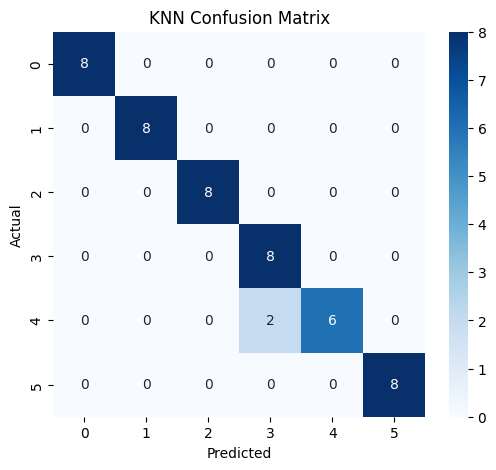

In [54]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix")
plt.show()

<div class="rqE">

The misclassifications between classes 3 and 4 are not surprising. Look at the PCA plot again...

</div>

## Ridge Regression

<div class="introT" title="The model">

**Ridge Regression** (RR) is a linear regression model that adds a **penalty** to the loss function.  
This regularization term shrinks the coefficients, helping to **reduce overfitting** and improve generalization, especially when predictors are correlated.  

The model still predicts as a linear combination of features, but large weights are penalized.  

</div>
<br>
<div class="introT" title="The database">
    
The dataset contains information about a group of people and their sleep patterns.  
Each record includes demographic, behavioral, and physiological indicators of sleep quality, such as:

- **Age** (in years).  
- **Gender** — biological sex.  
- **Sleep Duration** — total sleep time (in hours).  
- **REM Sleep Percentage** — share of total sleep spent in Rapid Eye Movement (REM) stage.  
- **Deep Sleep Percentage** — share of total sleep spent in deep sleep stage.  
- **Light Sleep Percentage** — share of total sleep spent in light sleep stage.  
- **Awakenings** — number of times the person woke up during the night.  
- **Caffeine Consumption** — intake of caffeine within 24 hours before bedtime.  
- **Alcohol Consumption** — intake of alcohol within 24 hours before bedtime.  
- **Smoking Status** — whether the person is a smoker.  
- **Exercise Frequency** — frequency of physical exercise prior to sleep.  

The **target variable** is **Sleep Efficiency**, expressed as a percentage (continuous variable).

More details about the dataset can be found on [Kaggle: Sleep Efficiency Dataset](https://www.kaggle.com/datasets/equilibriumm/sleep-efficiency)
</div>


In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report
)
import xgboost as xgb

# Load data 
csv_path = "./ML-data/10algos/Sleep_Efficiency.csv"  
df = pd.read_csv(csv_path)

# Peek at the data
print(df.head())
print("Columns:", list(df.columns))

# Define target variable
df = df.rename(columns={"Sleep efficiency": "target"})
df=df.drop(["ID"],axis=1)           #drop the Sample_ID column. It is not informative.
df= df.dropna().reset_index(drop=True) #drop rows with empty cells (missing data)
display(df)

   ID  Age  Gender  Sleep duration  REM sleep percentage  \
0   1   65  Female             6.0                    18   
1   2   69    Male             7.0                    19   
2   3   40  Female             8.0                    20   
3   4   40  Female             6.0                    23   
4   5   57    Male             8.0                    27   

   Deep sleep percentage  Light sleep percentage  Awakenings  \
0                     70                      12         0.0   
1                     28                      53         3.0   
2                     70                      10         1.0   
3                     25                      52         3.0   
4                     55                      18         3.0   

   Caffeine consumption  Alcohol consumption Smoking status  \
0                   0.0                  0.0            Yes   
1                   0.0                  3.0            Yes   
2                   0.0                  0.0             No   
3 

,Age,Gender,Sleep duration,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,target
0,65,Female,6.0,18,70,12,0.0,0.0,0.0,Yes,3.0,0.88
1,69,Male,7.0,19,28,53,3.0,0.0,3.0,Yes,3.0,0.66
2,40,Female,8.0,20,70,10,1.0,0.0,0.0,No,3.0,0.89
3,40,Female,6.0,23,25,52,3.0,50.0,5.0,Yes,1.0,0.51
4,57,Male,8.0,27,55,18,3.0,0.0,3.0,No,3.0,0.76
...,...,...,...,...,...,...,...,...,...,...,...,...
383,30,Female,7.5,28,20,52,4.0,50.0,2.0,Yes,1.0,0.53
384,27,Female,7.5,22,57,21,0.0,0.0,0.0,No,5.0,0.91
385,52,Male,6.0,28,57,15,4.0,25.0,0.0,No,3.0,0.74
386,45,Male,7.0,18,72,10,3.0,0.0,0.0,No,3.0,0.76


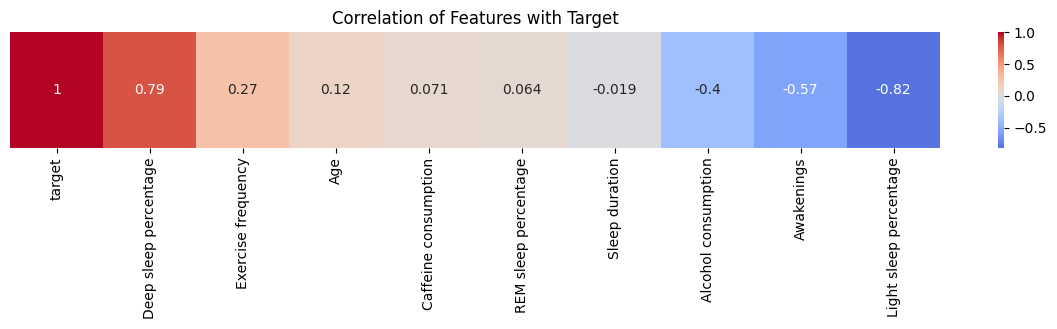

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)

# Select only the last row (target correlations)
target_corr = corr.loc["target"].sort_values(ascending=False)

plt.figure(figsize=(15, 1.5))
sns.heatmap(
    target_corr.to_frame().T, 
    annot=True, 
    cmap="coolwarm", 
    center=0, 
    cbar=True
)
plt.title("Correlation of Features with Target")
plt.yticks([])
plt.show()


Categorical columns: ['Gender', 'Smoking status']


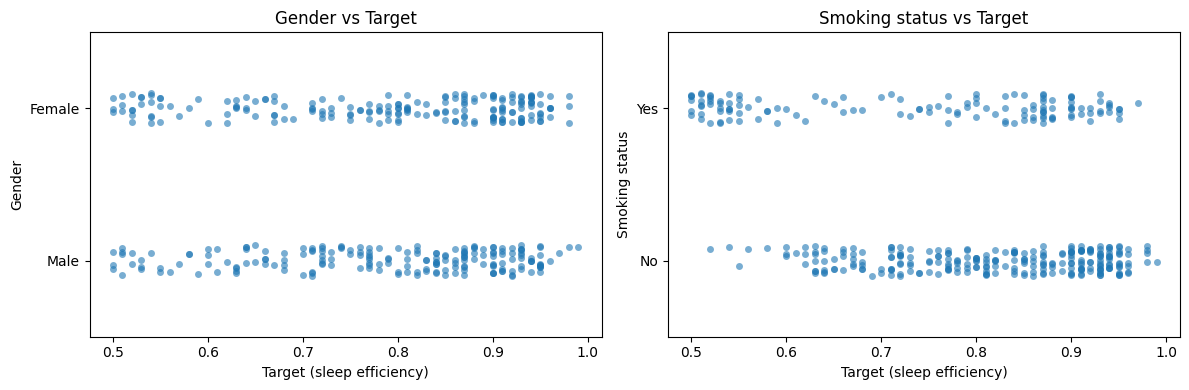

In [58]:
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
print("Categorical columns:", cat_cols)

fig, axes = plt.subplots(1, len(cat_cols), figsize=(6*len(cat_cols), 4), sharex=True)

for i, col in enumerate(cat_cols):
    sns.stripplot(
        data=df,
        x="target",
        y=col,
        jitter=True,
        alpha=0.6,
        legend=False,
        ax=axes[i]
    )
    axes[i].set_title(f"{col} vs Target")
    axes[i].set_xlabel("Target (sleep efficiency)")
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


### Data standardization

<div class="intro">
    
Many machine learning models work best when the input features are on a similar scale.  
For example, if one feature is measured in thousands (like salary) and another in decimals (like height in meters), the large numbers can dominate the learning process.

`StandardScaler` helps by transforming each feature so that:

- The **mean** becomes `0`
- The **standard deviation** becomes `1`

This means every feature is centered and scaled, making them easier to compare and ensuring that models treat all features fairly.

</div>
<br>

### One Hot Encoding

<div class="intro">

One-Hot Encoding (OHE) is a method to convert **categorical variables** (like `"Red"`, `"Green"`, `"Blue"`) into a numerical format that machine learning models can use.  

Instead of assigning numbers directly (e.g., Red=0, Green=1, Blue=2), which would imply an **order or magnitude** that doesn’t exist, OHE creates a new binary column for **each category**:

| Color   | OHE: Red | OHE: Green | OHE: Blue |
|---------|----------|------------|-----------|
| Red     |    1     |     0      |     0     |
| Green   |    0     |     1      |     0     |
| Blue    |    0     |     0      |     1     |
| Red     |    1     |     0      |     0     |

✨ Each row has exactly one `1` (the category present) and the rest are `0`s.  

This ensures that categorical data is represented **without introducing false numerical relationships** between categories.

👉 In practice, you can do One-Hot Encoding with **`OneHotEncoder` from scikit-learn**, which is especially useful inside machine learning pipelines.

</div>

In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

y = df["target"]
X = df.drop(columns=["target"])

cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X.select_dtypes(include=["number"]).columns.tolist()

# One-hot encode categoricals 
ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
X_cat_enc = ohe.fit_transform(X[cat_cols]) if len(cat_cols) else np.empty((len(X), 0))
X_cat_enc = pd.DataFrame(
    X_cat_enc,
    index=X.index,
    columns=ohe.get_feature_names_out(cat_cols) if len(cat_cols) else []
)

X_encoded = pd.concat([X[num_cols].copy(), X_cat_enc], axis=1)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42,
    stratify=y if y.nunique() < 20 else None
)

# Standardization
scaler = StandardScaler()
if len(num_cols):
    X_train.loc[:, num_cols] = scaler.fit_transform(X_train[num_cols])
    X_test.loc[:, num_cols]  = scaler.transform(X_test[num_cols])

display(X_train)

/tmp/ipykernel_17506/1812824127.py:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.46796675 -0.269176   -1.30117585  0.68910958  1.4999666   0.54168103
 -0.34289027  0.98396668 -0.34289027  0.09939538  1.27882378  0.76282385
 -1.00631875  1.7948237  -1.22746157 -0.8588902   1.13139523 -0.04803317
  0.98396668 -1.00631875  0.0256811  -0.8588902  -1.1537473  -1.08003302
 -1.37489012  0.54168103 -0.63774737 -1.08003302 -0.8588902   1.2051095
  1.05768095  0.17310965  0.0256811   1.4999666  -0.19546172  0.83653813
 -1.1537473   0.17310965  0.9102524   0.46796675 -1.1537473  -0.269176
  0.98396668 -2.11203287  1.05768095 -0.12174745 -0.63774737 -1.22746157
 -0.78517592  0.54168103 -1.00631875  0.9102524   0.83653813  0.39425248
 -1.08003302  0.09939538 -1.4486044   0.76282385 -0.71146165  0.09939538
  0.83653813  1.13139523 -1.22746157 -0.63774737 -0.269176    0.83653813
  1.05768095  0.9102524  -0.63774737  1.131

,Age,Sleep duration,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,Gender_Female,Gender_Male,Smoking status_No,Smoking status_Yes
63,0.467967,-0.575266,2.140793,0.467246,-0.953221,-0.439598,-0.822108,-0.697764,0.814069,1.0,0.0,1.0,0.0
238,-0.269176,0.564238,-1.352080,0.924586,-0.624670,-1.164467,0.923464,-0.067132,1.492459,1.0,0.0,1.0,0.0
132,-1.301176,-0.005514,0.103284,0.467246,-0.493250,-1.164467,0.923464,-0.697764,-0.542712,1.0,0.0,1.0,0.0
101,0.689110,0.564238,1.558648,0.271243,-0.624670,-0.439598,0.923464,-0.697764,0.814069,0.0,1.0,0.0,1.0
351,1.499967,0.564238,0.976502,0.205908,-0.427540,1.010140,-0.822108,0.563501,-1.221103,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.689110,-1.714769,-0.187789,-2.015457,2.069445,1.735009,-0.822108,1.194133,-1.221103,0.0,1.0,1.0,0.0
106,-1.890890,0.564238,-0.769934,-1.166112,1.346634,-0.439598,-0.822108,-0.697764,-1.221103,1.0,0.0,1.0,0.0
270,0.689110,1.703742,1.267575,0.140574,-0.427540,-0.439598,-0.822108,1.194133,0.814069,0.0,1.0,1.0,0.0
348,-0.195462,0.564238,-1.352080,1.120588,-0.821800,-1.164467,-0.822108,-0.697764,0.814069,0.0,1.0,0.0,1.0


### Training the model

In [60]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

ridge = Ridge(alpha=1.0)

ridge.fit(X_train, y_train)

y_pred  = ridge.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print(f"Test MAE : {mae:.2f}")
print(f"Test R2  : {r2:.2f}")

Test MAE : 0.05
Test R2  : 0.77


### Graphical output

#### Performance of the model on the test set

<div class="intro">

Plotting the **actual values against the predicted values** shows how closely the model’s predictions match reality; with perfect performance, all points would lie exactly on the diagonal line.

Plotting the **residuals against the predicted values** helps reveal bias or systematic errors; ideally, the residuals should be randomly scattered around zero without any clear pattern.

Plotting the **distribution of residuals** shows how the error is spread; in a well-performing model, the residuals should be centered around zero and roughly symmetric.

</div>

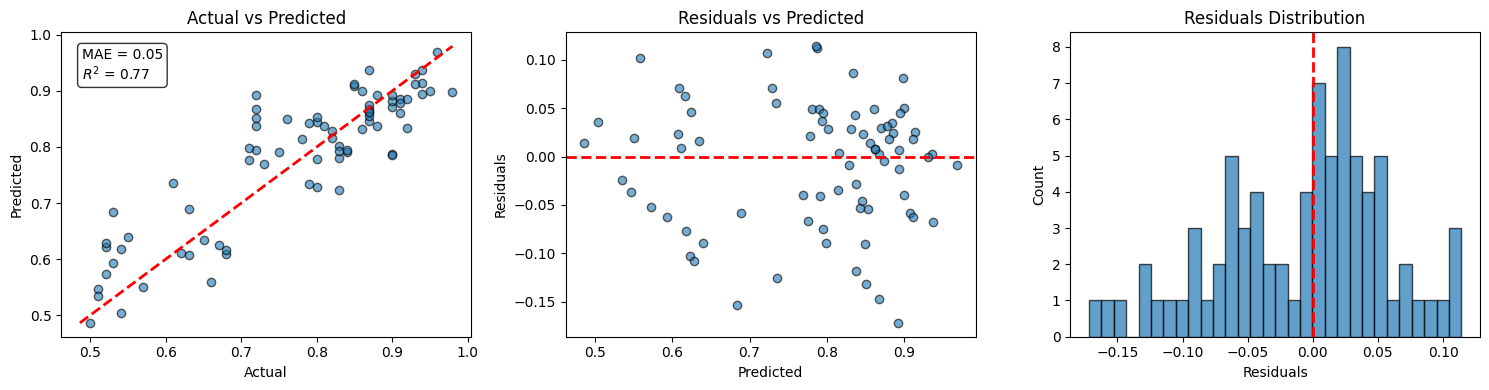

In [61]:
residuals = np.asarray(y_test) - np.asarray(y_pred)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Actual vs Predicted
axes[0].scatter(y_test, y_pred, alpha=0.6, edgecolor="k")
min_v = min(y_test.min(), y_pred.min())
max_v = max(y_test.max(), y_pred.max())
axes[0].plot([min_v, max_v], [min_v, max_v], "r--", lw=2)
axes[0].set_xlabel("Actual")
axes[0].set_ylabel("Predicted")
axes[0].set_title("Actual vs Predicted")

textstr = f"MAE = {mae:.2f}\n$R^2$ = {r2:.2f}"
axes[0].text(
    0.05, 0.95, textstr,
    transform=axes[0].transAxes,
    fontsize=10,
    verticalalignment="top",
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8)
)

# Residuals vs Predicted
axes[1].scatter(y_pred, residuals, alpha=0.6, edgecolor="k")
axes[1].axhline(0, color="red", linestyle="--", lw=2)
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Residuals")
axes[1].set_title("Residuals vs Predicted")

# Histogram of Residuals
axes[2].hist(residuals, bins=30, edgecolor="k", alpha=0.7)
axes[2].axvline(0, color="red", linestyle="--", lw=2)
axes[2].set_xlabel("Residuals")
axes[2].set_ylabel("Count")
axes[2].set_title("Residuals Distribution")

plt.tight_layout()
plt.show()

#### Feature importance

<div class="intro">

Ridge regression provides access to its **coefficients**, which can be used as a form of feature importance interpretation. This barplot illustrates the coefficients assigned to each descriptor by the Ridge regressor. Positive values indicate factors that increase the predicted outcome (in this case, sleep efficiency), while negative values correspond to factors that decrease it. The **magnitude of each coefficient** represents its contribution to the prediction and indicates the relative importance of that descriptor.

</div>

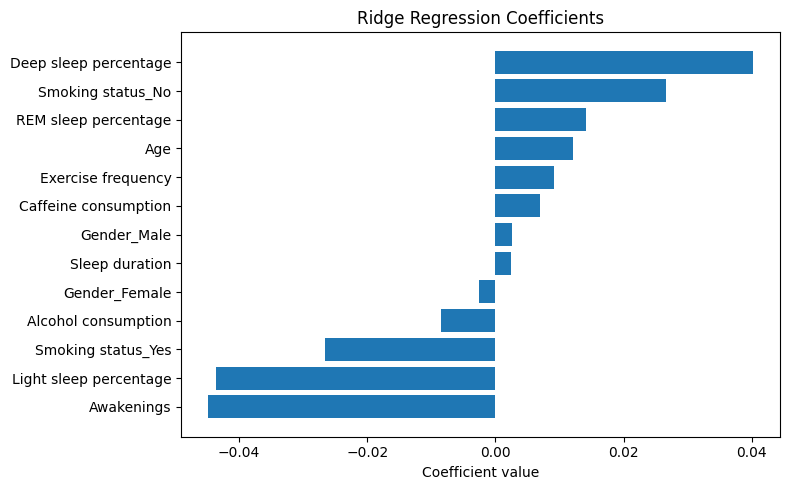

In [62]:
# Extract coefficients with feature names 
coef_df = pd.DataFrame({
    "feature": X_train.columns,
    "coefficient": ridge.coef_
}).sort_values(by="coefficient", ascending=False)

# Plot all coefficients 
fig, ax = plt.subplots(figsize=(8, 5))
y_pos = np.arange(len(coef_df))
ax.barh(y_pos, coef_df["coefficient"], align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels(coef_df["feature"])
ax.invert_yaxis()  # largest at top
ax.set_xlabel("Coefficient value")
ax.set_title("Ridge Regression Coefficients")
plt.tight_layout()
plt.show()

## Kernel Ridge Regression

<div class="introT" title="The model">

**Kernel Ridge Regression** (KRR) extends ridge regression by using the kernel trick.
Instead of working directly with the original features, it maps them into a higher-dimensional space where complex patterns can be captured.

Like ridge regression, it adds a **penalty** to control overfitting, but now it can model nonlinear relationships while still keeping the solution well-regularized.

</div>
<br>
<div class="introT" title="The database">
    
The dataset contains information about California districts and their housing characteristics.  
Each record describes demographic and geographic features of a district, such as:  

- **MedInc** — median income in the block group.  
- **HouseAge** — median house age in the block group.  
- **AveRooms** — average number of rooms per household.  
- **AveBedrms** — average number of bedrooms per household.  
- **Population** — total population of the block group.  
- **AveOccup** — average number of household members.  
- **Latitude** — geographical latitude of the block group.  
- **Longitude** — geographical longitude of the block group.  

The **target variable** is **Median House Value**, expressed in hundreds of thousands of dollars ($100,000).  

More details about the dataset can be found on [The California housing dataset](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html)
</div>


In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report
)
import xgboost as xgb

# Load data 
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame.rename(columns={"MedHouseVal": "target"})
df= df.dropna().reset_index(drop=True) #drop rows with empty cells (missing data)

# Peek at the data
print(df.head())
print("Columns:", list(df.columns))

display(df)

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  
Columns: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'target']


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


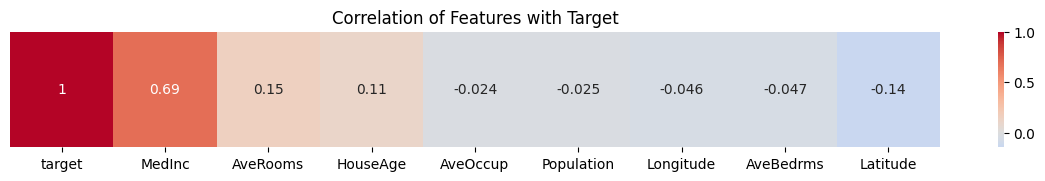

In [68]:
import matplotlib.pyplot as plt
corr = df.corr(numeric_only=True)

# Select only the last row (target correlations)
target_corr = corr.loc["target"].sort_values(ascending=False)

plt.figure(figsize=(15, 1.5))
sns.heatmap(
    target_corr.to_frame().T, 
    annot=True, 
    cmap="coolwarm", 
    center=0, 
    cbar=True
)
plt.title("Correlation of Features with Target")
plt.yticks([])
plt.show()

### Data standardization

<div class="intro">
    
Many machine learning models work best when the input features are on a similar scale.  
For example, if one feature is measured in thousands (like salary) and another in decimals (like height in meters), the large numbers can dominate the learning process.

`StandardScaler` helps by transforming each feature so that:

- The **mean** becomes `0`
- The **standard deviation** becomes `1`

This means every feature is centered and scaled, making them easier to compare and ensuring that models treat all features fairly.

</div>

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = df["target"]
X = df.drop(columns=["target"])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()

X_train.loc[:] = scaler.fit_transform(X_train)
X_test.loc[:]  = scaler.transform(X_test)

display(X_train)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,-0.326196,0.348490,-0.174916,-0.208365,0.768276,0.051376,-1.372811,1.272587
8267,-0.035843,1.618118,-0.402835,-0.128530,-0.098901,-0.117362,-0.876696,0.709162
17445,0.144701,-1.952710,0.088216,-0.257538,-0.449818,-0.032280,-0.460146,-0.447603
14265,-1.017864,0.586545,-0.600015,-0.145156,-0.007434,0.077507,-1.382172,1.232698
2271,-0.171488,1.142008,0.349007,0.086624,-0.485877,-0.068832,0.532084,-0.108551
...,...,...,...,...,...,...,...,...
11284,1.307215,0.507194,0.290620,-0.393391,-0.675847,-0.005588,-0.872016,0.808883
11964,-0.436266,0.348490,0.600411,0.398898,0.287195,0.069722,-0.759688,1.073144
5390,-0.496973,0.586545,-0.606759,-0.039216,0.289833,0.020306,-0.755007,0.599469
860,0.965450,-1.079841,0.402175,-0.066265,0.308303,0.007076,0.906510,-1.185540


### Training the model

In [70]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_absolute_error, r2_score

krr = KernelRidge(kernel="rbf", alpha=0.1, gamma=0.1)

krr.fit(X_train, y_train)
y_pred = krr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print(f"Test MAE : {mae:.2f}")
print(f"Test R2  : {r2:.2f}")

Test MAE : 0.40
Test R2  : 0.75


### Graphical output

#### Performance of the model on the test set

<div class="intro">

Plotting the **actual values against the predicted values** shows how closely the model’s predictions match reality; with perfect performance, all points would lie exactly on the diagonal line.

Plotting the **residuals against the predicted values** helps reveal bias or systematic errors; ideally, the residuals should be randomly scattered around zero without any clear pattern.

Plotting the **distribution of residuals** shows how the error is spread; in a well-performing model, the residuals should be centered around zero and roughly symmetric.

</div>

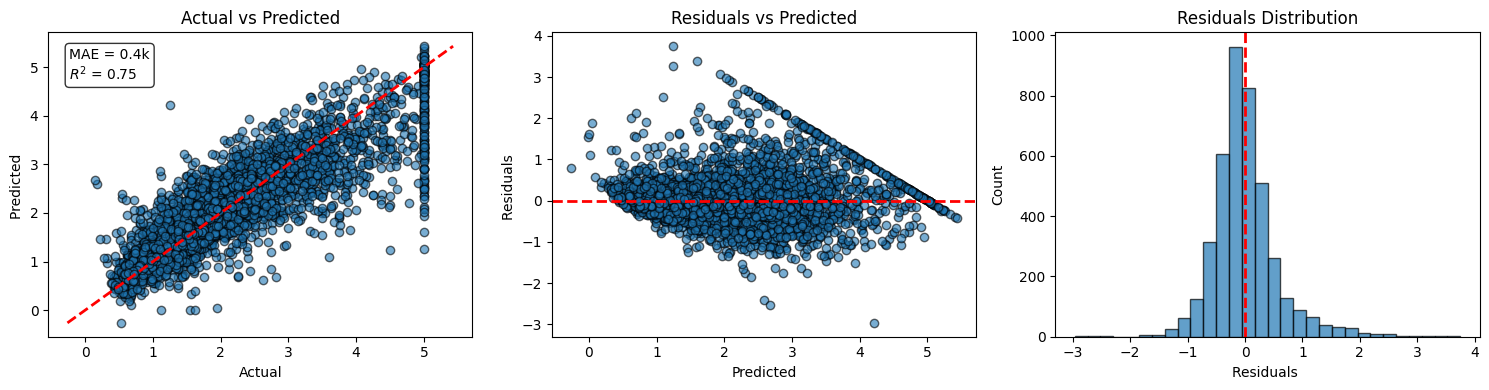

In [71]:
residuals = np.asarray(y_test) - np.asarray(y_pred)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Actual vs Predicted
axes[0].scatter(y_test, y_pred, alpha=0.6, edgecolor="k")
min_v = min(y_test.min(), y_pred.min())
max_v = max(y_test.max(), y_pred.max())
axes[0].plot([min_v, max_v], [min_v, max_v], "r--", lw=2)
axes[0].set_xlabel(r"Actual")
axes[0].set_ylabel(r"Predicted ")
axes[0].set_title("Actual vs Predicted")

textstr = f"MAE = {mae:.1f}k\n$R^2$ = {r2:.2f}"
axes[0].text(
    0.05, 0.95, textstr,
    transform=axes[0].transAxes,
    fontsize=10,
    verticalalignment="top",
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8)
)

# Residuals vs Predicted
axes[1].scatter(y_pred, residuals, alpha=0.6, edgecolor="k")
axes[1].axhline(0, color="red", linestyle="--", lw=2)
axes[1].set_xlabel(r"Predicted")
axes[1].set_ylabel(r"Residuals ")
axes[1].set_title("Residuals vs Predicted")

# Histogram of Residuals
axes[2].hist(residuals, bins=30, edgecolor="k", alpha=0.7)
axes[2].axvline(0, color="red", linestyle="--", lw=2)
axes[2].set_xlabel(r"Residuals ")
axes[2].set_ylabel("Count")
axes[2].set_title("Residuals Distribution")

plt.tight_layout()
plt.show()

<div class="rqE">

The model struggles to predict the highest values correctly. Why do you think this happens?

</div>

#### Let's take a look at the distribution of the target variable (house value)

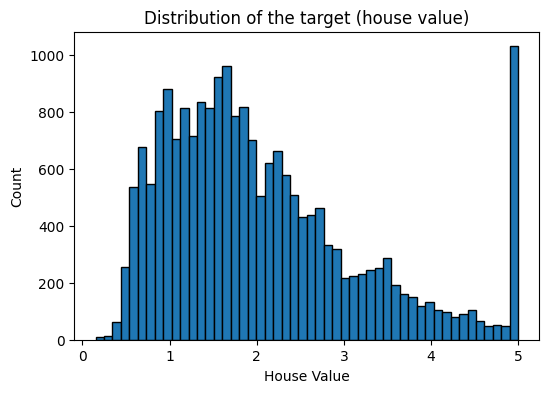

In [72]:
plt.figure(figsize=(6,4))
plt.hist(y, bins=50, edgecolor="k")
plt.xlabel(r"House Value")
plt.ylabel("Count")
plt.title("Distribution of the target (house value)")
plt.show()

<div class="rqE">

The target variable is highly **right-skewed**: most houses are clustered at lower prices, while a few very expensive houses stretch the distribution to the right. This skewness can affect regression performance.

</div>

#### Let's remove high-value houses and train the model again

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,14858.000000,14858.000000,14858.000000,14858.000000,14858.000000,14858.000000,14858.000000,14858.000000,14858.000000
mean,3.217398,27.950666,5.223369,1.108300,1450.579418,3.210416,35.707624,-119.457971,1.472019
std,1.208070,12.242746,2.419509,0.503556,1148.999570,11.519906,2.224855,1.986063,0.544640
min,0.499900,1.000000,0.846154,0.375000,6.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.306800,18.000000,4.337645,1.007715,799.000000,2.517221,33.930000,-121.420000,1.013000
50%,3.095300,28.000000,5.054376,1.051779,1191.000000,2.925591,34.290000,-118.460000,1.477000
75%,4.018650,36.000000,5.749236,1.105900,1765.000000,3.430923,37.780000,-117.950000,1.894000
max,15.000100,52.000000,132.533333,34.066667,35682.000000,1243.333333,41.950000,-114.310000,2.500000


Test MAE : 0.24
Test R2  : 0.67


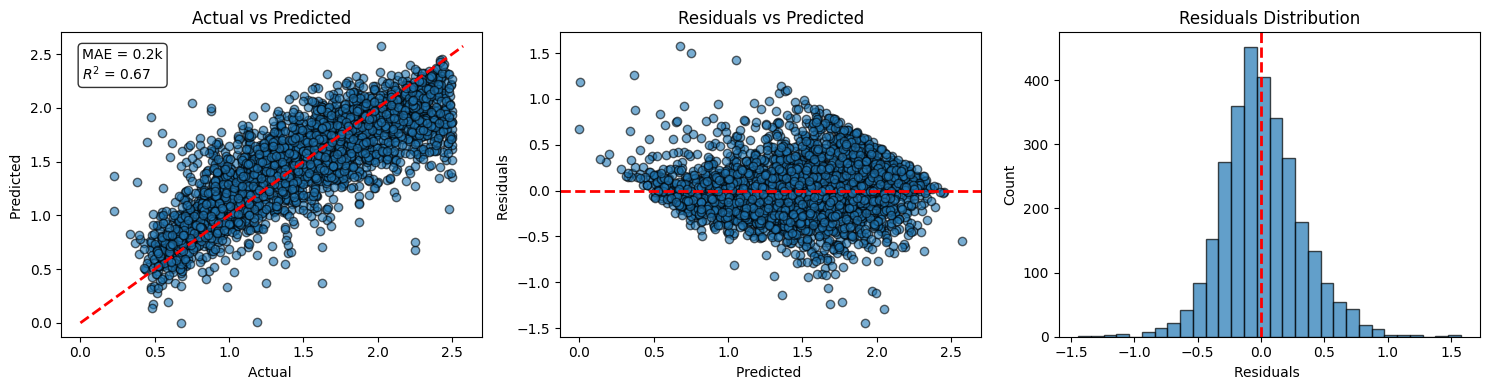

In [73]:
# Load data 
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame.rename(columns={"MedHouseVal": "target"})
df= df.dropna().reset_index(drop=True) #drop rows with empty cells (missing data)

# Drop rows where target exceeds 250,000
df = df[df["target"] <= 2.5].reset_index(drop=True)
display(df.describe())
y = df["target"]
X = df.drop(columns=["target"])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train.loc[:] = scaler.fit_transform(X_train)
X_test.loc[:]  = scaler.transform(X_test)

# display(X_train)

krr = KernelRidge(kernel="rbf", alpha=0.1, gamma=None)

krr.fit(X_train, y_train)
y_pred = krr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print(f"Test MAE : {mae:.2f}")
print(f"Test R2  : {r2:.2f}")

residuals = np.asarray(y_test) - np.asarray(y_pred)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Actual vs Predicted
axes[0].scatter(y_test, y_pred, alpha=0.6, edgecolor="k")
min_v = min(y_test.min(), y_pred.min())
max_v = max(y_test.max(), y_pred.max())
axes[0].plot([min_v, max_v], [min_v, max_v], "r--", lw=2)
axes[0].set_xlabel(r"Actual ")
axes[0].set_ylabel(r"Predicted ")
axes[0].set_title("Actual vs Predicted")

textstr = f"MAE = {mae:.1f}k\n$R^2$ = {r2:.2f}"
axes[0].text(
    0.05, 0.95, textstr,
    transform=axes[0].transAxes,
    fontsize=10,
    verticalalignment="top",
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8)
)

# Residuals vs Predicted
axes[1].scatter(y_pred, residuals, alpha=0.6, edgecolor="k")
axes[1].axhline(0, color="red", linestyle="--", lw=2)
axes[1].set_xlabel(r"Predicted ")
axes[1].set_ylabel(r"Residuals ")
axes[1].set_title("Residuals vs Predicted")

# Histogram of Residuals
axes[2].hist(residuals, bins=30, edgecolor="k", alpha=0.7)
axes[2].axvline(0, color="red", linestyle="--", lw=2)
axes[2].set_xlabel(r"Residuals ")
axes[2].set_ylabel("Count")
axes[2].set_title("Residuals Distribution")

plt.tight_layout()
plt.show()

<div class="rqE">

As expected, the MAE decreased. But so did the $R^2$.

Dropping high-value houses may improve performance, but it is also limiting the scope of predictions: the model will no longer learn about very expensive houses.

</div>

<div class="exE", title="Improve the model">

KRR may not be the best fit here.  Try replacing it with other regressors.  
Train, evaluate, and compare their MAE and $R^2$ scores.

</div>

## Naive bayes

### Introduction

<div class="introT" title="The model">

A Naive Bayes classifier is based on Bayes' Theorem and the assumption of feature independence, in other words it assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.
Even if these features are related to each other, a Naive Bayes classifier would consider all of these properties independently when calculating the probability of a particular outcome.

A Naive Bayesian model is easy to build and useful for massive datasets. It's simple and is known to outperform even highly sophisticated classification methods.

These classifiers are a family of simple “probabilistic classifiers” that use the Bayes theorem and strong (naive) independence assumptions between the features. It’s particularly used in text classification problems such as spam detection, sentiment analysis, and document categorization
</div>
<br>
<div class="introT" title="The Bayes theorem">

Here's a more detailed explanation:

#### Key Concepts:

1. **Bayes' Theorem:**

Bayes' Theorem describes the probability of an event A, based on prior knowledge of conditions, B, that might be related to the event. It is expressed as:
$$\mathcal{P}(\mathrm{A|B})=\frac{\mathcal{P}(\mathrm{B|A})\cdot\mathcal{P}(\mathrm{A})}{\mathcal{P}(\mathrm{B})}$$

where:
- $\mathcal{P}(\mathrm{A|B})$ is the posterior probability of class A given predictor B
- $\mathcal{P}(\mathrm{B|A})$ is the likelihood of predictor B given class A
- $\mathcal{P}(\mathrm{A})$ is the prior probability of class A
- $\mathcal{P}(\mathrm{B})$ is the prior probability of predictor B

2. **Naive Assumption of Independence:**
   The "naive" part of Naive Bayes assumes that the features are independent of each other given the class. This simplification makes the calculation of the joint probability of the features easier and computationally efficient.

#### Types of Naive Bayes Classifiers:

1. **Gaussian Naive Bayes:**
   Assumes that the features follow a normal distribution. This is useful for continuous data.

2. **Multinomial Naive Bayes:**
   Used for discrete data and often applied in text classification with word counts or frequencies.

3. **Bernoulli Naive Bayes:**
   Also used for discrete data, but specifically for binary/boolean features (e.g., presence or absence of a word in text classification).

#### How Naive Bayes Works:

1. **Training Phase:**
   - Calculate the prior probability for each class.
   - Calculate the likelihood of each feature given each class.
   - Store these probabilities for use during the prediction phase.

2. **Prediction Phase:**
   - For a new instance, calculate the posterior probability for each class using Bayes' Theorem.
   - Choose the class with the highest posterior probability as the predicted class.

#### Example:

Let's say we have a simple dataset of emails labeled as "spam" or "not spam" with features representing the presence of specific words, namely Free, Win , Click.

##### Training Data

| Email   | Free | Win | Click | Label     |
|---------|--------|-------|---------|-----------|
| Email 1 | Yes    | Yes   | Yes     | Spam      |
| Email 2 | No     | Yes   | No      | Not Spam  |
| Email 3 | Yes    | No    | Yes     | Spam      |
| Email 4 | No     | No    | No      | Not Spam  |

##### Steps

1. **Calculate Prior Probabilities:**
   
- $\mathcal{P}(\text{Spam}) = \frac{2}{4} = 0.5$
- $\mathcal{P}(\text{Not Spam}) = \frac{2}{4} = 0.5$

2. **Calculate Likelihoods:**
- $\mathcal{P}(\text{Free}|\text{Spam}) = \frac{2}{2} = 1$
- $\mathcal{P}(\text{Win}|\text{Spam}) = \frac{1}{2} = 0.5$
- $\mathcal{P}(\text{Click}|\text{Spam}) = \frac{2}{2} = 1$
- $\mathcal{P}(\text{Free}|\text{Not Spam}) = \frac{0}{2} = 0$
- $\mathcal{P}(\text{Win}|\text{Not Spam}) = \frac{1}{2} = 0.5$
- $\mathcal{P}(\text{Click}|\text{Not Spam}) = \frac{0}{2} = 0$

3. **Predict a New Email:**

For a new email with features "Free: Yes", "Win: Yes", "Click: Yes":

$$\mathcal{P}(\text{Spam|Email}) = \frac{\mathcal{P}(\text{Email|Spam}) \cdot \mathcal{P}(\text{Spam})}{\mathcal{P}(\text{Email})} \approx \mathcal{P}(\text{Free|Spam}) \cdot \mathcal{P}(\text{Win|Spam}) \cdot \mathcal{P}(\text{Click|Spam}) \cdot \mathcal{P}(\text{Spam}) \approx 1 \cdot 0.5 \cdot 1 \cdot 0.5 = 0.25$$

Similarly, calculate for Not Spam:

$$\mathcal{P}(\text{Not Spam|Email}) \approx \mathcal{P}(\text{Free|Not Spam}) \cdot \mathcal{P}(\text{Win|Not Spam}) \cdot \mathcal{P}(\text{Click|Not Spam}) \cdot \mathcal{P}(\text{Not Spam}) \approx 0 \cdot 0.5 \cdot 0 \cdot 0.5 = 0$$

Since $\mathcal{P}(\text{Spam|Email}) > \mathcal{P}(\text{Not Spam|Email})$, we classify the new email as Spam.

#### Cons and pros

##### Advantages:

- Simple to understand and implement.
- Requires less training data.
- Handles both continuous and discrete data.
- Highly scalable with the number of predictors/features.

##### Disadvantages:

- The assumption of independent predictors is rarely true in real-world applications.
- Can perform poorly if the feature independence assumption is violated.

</div>
<br>
<div class="introT" title="The database">


</div>

In [75]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import pandas as pd

# Load the Digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predicting the test set results
y_hat = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_hat)
precision = precision_score(y_test, y_hat, average='macro')
recall = recall_score(y_test, y_hat, average='macro')
f1 = f1_score(y_test, y_hat, average='macro')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

Accuracy: 0.85
Precision: 0.86
Recall: 0.85
F1 score: 0.84


<div class="rqE">

The Naive Bayes model has a **good performance** on this dataset, with fairly balanced precision and recall. It is quite effective in classifying handwritten digits, though there’s **room for improvement**, especially in terms of accuracy and F1 score.
</div>

# Bibliography and useful links

[Top 10 Machine Learning Algorithms For Beginners: Supervised, and More, by Simon Tavasoli](https://www.simplilearn.com/10-algorithms-machine-learning-engineers-need-to-know-article)

[Top 10 Machine Learning Algorithms for Beginner Data Scientists](https://medium.com/@nathanrosidi/top-10-machine-learning-algorithms-for-beginner-data-scientists-aae78826712f)

[Wikipedia page on the perceptron model](https://en.wikipedia.org/wiki/Perceptron)

[Hands-on machine learning with scikit-learn, keras and tensorflow (3rd edition, **2022**), Aurélien Géron, O'Reilly editions](https://github.com/ageron/handson-ml3)

[TensorFlow 2 Tutorial: Get Started in Deep Learning with tf.keras](https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/)

Some images were generated with [DALL·E](https://openai.com/dall-e-2)

In [74]:
t4pPC.end()

**End at:** Wednesday 01 October 2025, 12:33:56  
**Duration:** 01:04:02 073ms

<p style="text-align: center"><img width="800px" src="./config/svg/logoEnd.svg" style="margin-left:auto; margin-right:auto"/></p>